<a href="https://colab.research.google.com/github/bala-codes/GASTRO-INTESTINAL-TRACT-DISEASE-CLASSIFIER-USING-DEEP-LEARNING/blob/master/codes%20(FASTAI)/FINAL%20ENDOSCOPY%20GI%20FASTAI%20SINGLE%20INPUT%20PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# NEED TO SET THRESHOLD NOW

In [ ]:
%%time

# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

# If not, uncomment this line and run to install them
!pip install torch torchvision fastai

In [ ]:
%%time
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import os
import numpy as np
from skimage.transform import resize
from skimage.io import *
from skimage import img_as_ubyte

from fastai import *
from fastai.vision import *
from fastai.core import *
from fastai.metrics import accuracy

def img_show_resize(PATH):
  image = plt.imread(PATH)
  img_resized = resize(image, (128, 128))

  assert img_resized.shape == (128, 128, 3)
  return img_resized

def threshold(val, thresh = 0.4):
  temp =  val
  if temp >= thresh:
    return val
  else:
    val = 0.0
    return val


def plotter_endos(prediction):
    prediction1 = prediction
    final = str(prediction1[0])
    scores = prediction1[2]
    a1 = threshold(float((scores[0])))
    a2 = threshold(float((scores[1])))
    a3 = threshold(float((scores[2])))
    a4 = threshold(float((scores[3])))
    a5 = threshold(float((scores[4])))
    a6 = threshold(float((scores[5])))
    a7 = threshold(float((scores[6])))
    a8 = threshold(float((scores[7])))
    healthy = False


    start = "\033[1m"
    end = "\033[0;0m"
    print("OUTPUT - "+ start + str(final) + end)
    print()
    class_labels = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
    j = [a1,a2,a3,a4,a5,a6,a7,a8]
    y_pos = np.arange(len(class_labels))
    plt.xlim([0.0,1.0])
    plt.barh(y_pos, j, alpha=0.8, color=['red'])
    plt.yticks(y_pos,class_labels)
    if sum(j) == 0:
      x_pos = 0.35
      y_pos = 6.5
      plt.text(x_pos, y_pos, "HEALTHY", fontsize= 25, color='green',alpha = 0.9)
      healthy = True
    plt.title('PREDICTION FOR ENDOSCOPIC IMAGES OF THE HUMAN GASTROINTESTINAL TRACT')
    plt.xlabel('Percentage')
    plt.ylabel('Labels')
    plt.show()


def final_plotter_endos(prediction1,prediction2,prediction3):
    pred1 = prediction1
    final1 = str(pred1[0])
    scores1 = pred1[2]
    a1 = threshold(float((scores1[0])))
    b1 = threshold(float((scores1[1])))
    c1 = threshold(float((scores1[2])))
    d1 = threshold(float((scores1[3])))
    e1 = threshold(float((scores1[4])))
    f1 = threshold(float((scores1[5])))
    g1 = threshold(float((scores1[6])))
    h1 = threshold(float((scores1[7])))

    pred2 = prediction2
    final2 = str(pred2[0])
    scores2 = pred2[2]
    a2 = threshold(float((scores2[0])))
    b2 = threshold(float((scores2[1])))
    c2 = threshold(float((scores2[2])))
    d2 = threshold(float((scores2[3])))
    e2 = threshold(float((scores2[4])))
    f2 = threshold(float((scores2[5])))
    g2 = threshold(float((scores2[6])))
    h2 = threshold(float((scores2[7])))

    pred3 = prediction3
    final3 = str(pred3[0])
    scores3 = pred3[2]
    a3 = threshold(float((scores3[0])))
    b3 = threshold(float((scores3[1])))
    c3 = threshold(float((scores3[2])))
    d3 = threshold(float((scores3[3])))
    e3 = threshold(float((scores3[4])))
    f3 = threshold(float((scores3[5])))
    g3 = threshold(float((scores3[6])))
    h3 = threshold(float((scores3[7])))

    a = np.mean([a1,a2,a3], dtype=float)
    b = np.mean([b1,b2,b3], dtype=float)
    c = np.mean([c1,c2,c3], dtype=float)
    d = np.mean([d1,d2,d3], dtype=float)
    e = np.mean([e1,e2,e3], dtype=float)
    f = np.mean([f1,f2,f3], dtype=float)
    g = np.mean([g1,g2,g3], dtype=float)
    h = np.mean([h1,h2,h3], dtype=float)

    healthy = False

    start = "\033[1m"
    end = "\033[0;0m"
    print()
    x = np.argmax([a,b,c,d,e,f,g,h])
    class_labels = ['dyed-lifted-polyps', 'dyed-resection-margins', 'esophagitis', 'normal-cecum', 'normal-pylorus', 'normal-z-line', 'polyps', 'ulcerative-colitis']
    outval = class_labels[x]
    j = [a,b,c,d,e,f,g,h]
    y_pos = np.arange(len(class_labels))
    plt.xlim([0.0,1.0])
    plt.barh(y_pos, j, alpha=0.8, color=['red'])
    plt.yticks(y_pos,class_labels)
    if sum(j) == 0:
      x_pos = 0.35
      y_pos = 6.5
      plt.text(x_pos, y_pos, "HEALTHY", fontsize= 25, color='green',alpha = 0.9)
    plt.title('FINAL PREDICTION FOR ENDOSCOPIC IMAGES OF THE HUMAN GASTROINTESTINAL TRACT')
    plt.xlabel('Percentage')
    plt.ylabel('Labels')
    plt.show()
    print("THE FINAL OUTPUT - "+ start + str(outval) + end)
    return outval



# IMPORT THE MODELS HERE

In [ ]:
%%time

path1 = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/'
learner1 = load_learner(path1, 'GASTRO - FASTAI - RESNET18.pkl')

path2 = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/'
learner2 = load_learner(path2, 'GASTRO - FASTAI - RESNET34.pkl')

path3 = '/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/'
learner3 = load_learner(path3, 'GASTRO - FASTAI - VGG19.pkl')

print("All 3 Models Loaded Successfully")

All 3 Models Loaded Successfully
CPU times: user 39 ms, sys: 440 ms, total: 479 ms
Wall time: 6.88 s


# SINGLE INPUT IMAGE PREDICTION

In [ ]:
path = "/content/dyed-lifted-polyps.jpg"
img1 = img_show_resize(path)
imsave(path, img1)

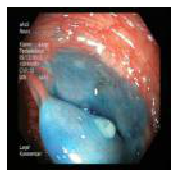

In [ ]:
testimg1 = open_image('/content/dyed-lifted-polyps.jpg')
testimg1.show()

OUTPUT - dyed-lifted-polyps



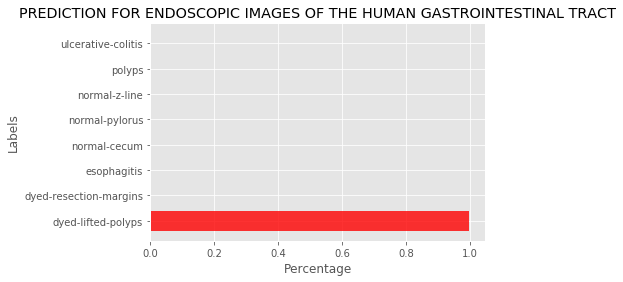

OUTPUT - dyed-lifted-polyps



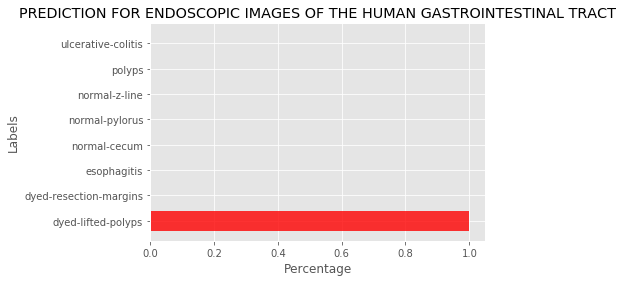

OUTPUT - dyed-lifted-polyps



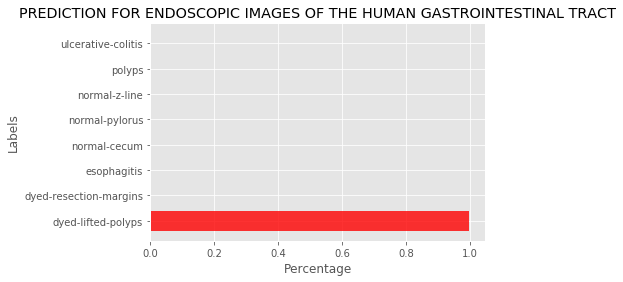

CPU times: user 821 ms, sys: 29.3 ms, total: 850 ms
Wall time: 869 ms


In [ ]:
%%time
prediction1 = learner1.predict(testimg1)
prediction2 = learner2.predict(testimg1)
prediction3 = learner3.predict(testimg1)

plotter_endos(prediction1)
plotter_endos(prediction2)
plotter_endos(prediction3)

OUTPUT - dyed-lifted-polyps



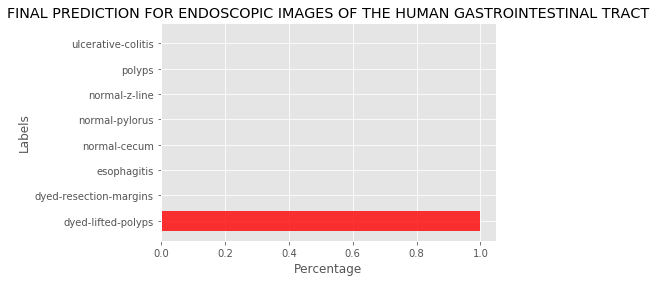

'dyed-lifted-polyps'

In [ ]:
final_plotter_endos(prediction1,prediction2,prediction3)

# BUNCH / FOLDER IMAGES PREDICTION

ACTUAL LABEL - dyed-lifted-polyps.jpg
OUTPUT - dyed-lifted-polyps



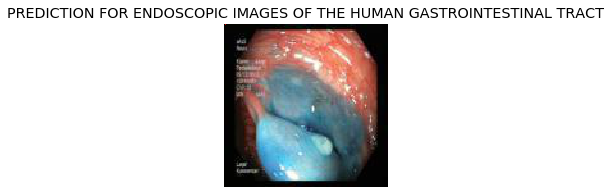

OUTPUT - dyed-lifted-polyps



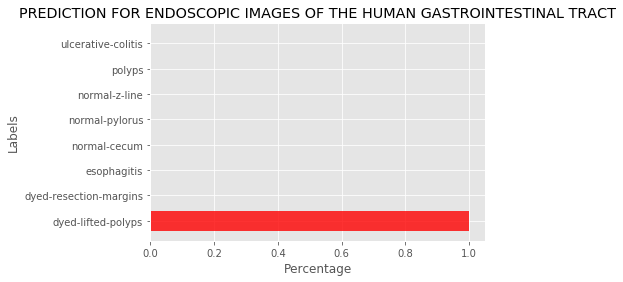

OUTPUT - dyed-lifted-polyps



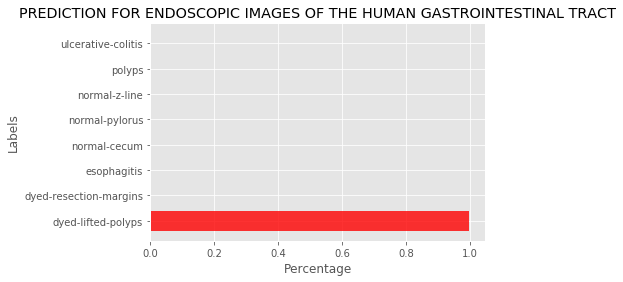

ACTUAL LABEL - dyed-lifted-polyps.jpg



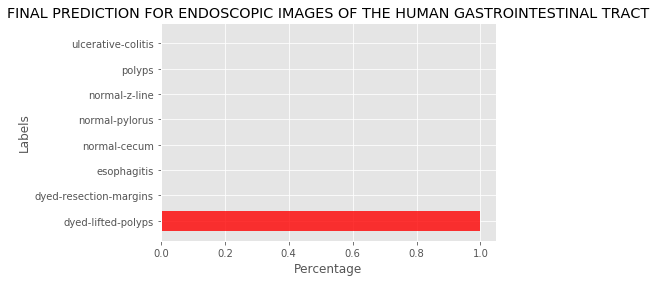

THE FINAL OUTPUT - dyed-lifted-polyps
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - dyed-lifted-polyps1.jpg
OUTPUT - dyed-lifted-polyps



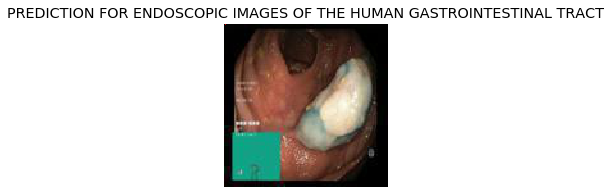

OUTPUT - dyed-lifted-polyps



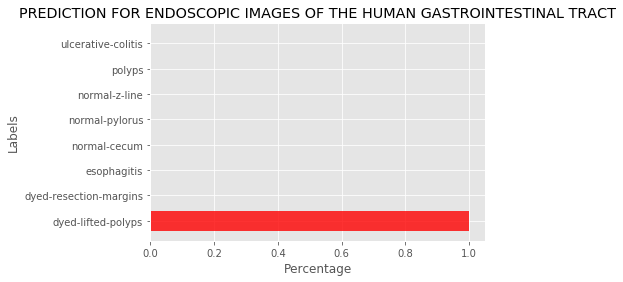

OUTPUT - dyed-lifted-polyps



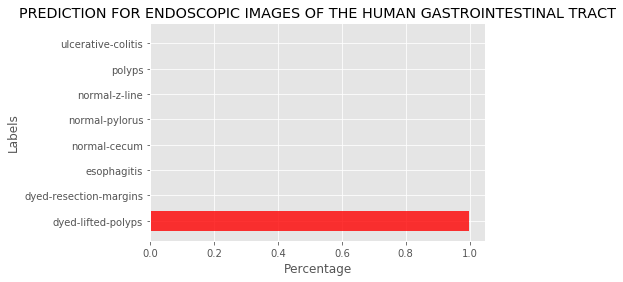

ACTUAL LABEL - dyed-lifted-polyps1.jpg



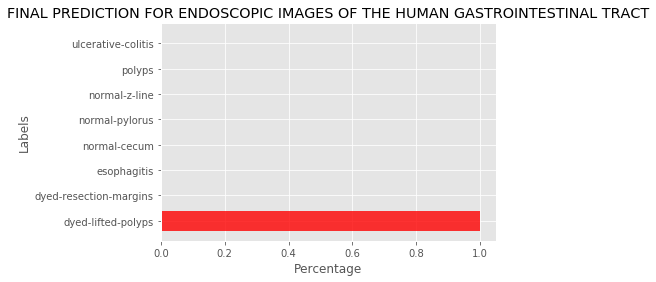

THE FINAL OUTPUT - dyed-lifted-polyps
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - dyed-lifted-polyps5.jpg
OUTPUT - dyed-lifted-polyps



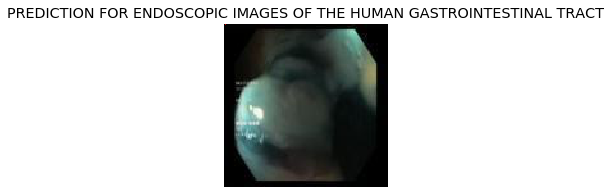

OUTPUT - dyed-lifted-polyps



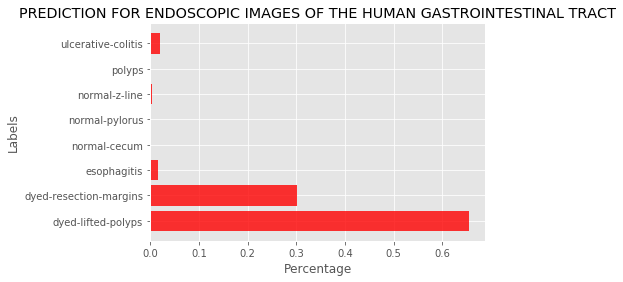

OUTPUT - dyed-resection-margins



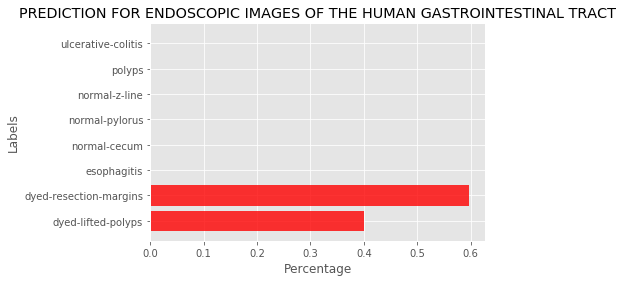

ACTUAL LABEL - dyed-lifted-polyps5.jpg



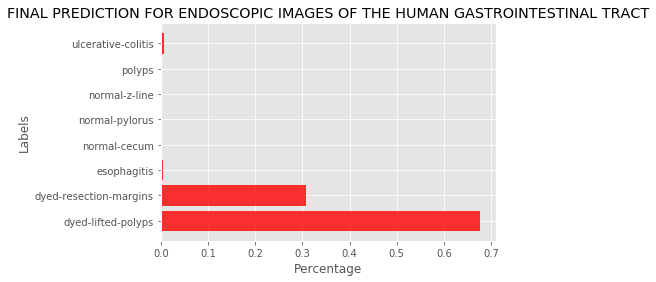

THE FINAL OUTPUT - dyed-lifted-polyps
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - dyed-lifted-polyps3.jpg
OUTPUT - dyed-lifted-polyps



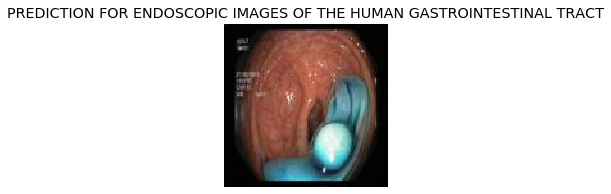

OUTPUT - dyed-lifted-polyps



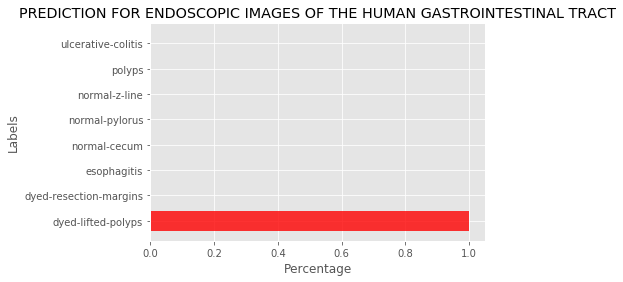

OUTPUT - dyed-lifted-polyps



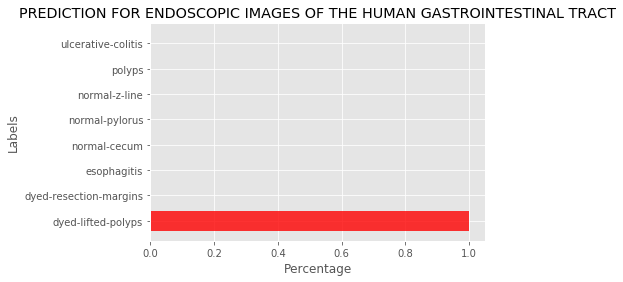

ACTUAL LABEL - dyed-lifted-polyps3.jpg



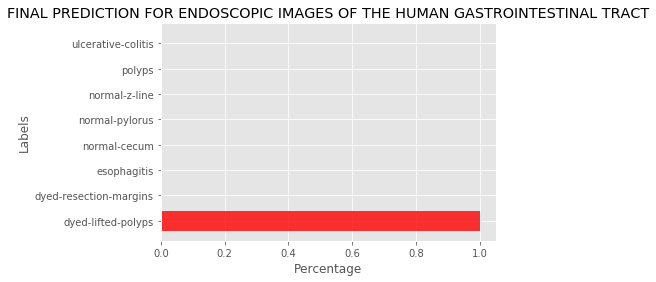

THE FINAL OUTPUT - dyed-lifted-polyps
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - dyed-resection-margins2.jpg
OUTPUT - dyed-resection-margins



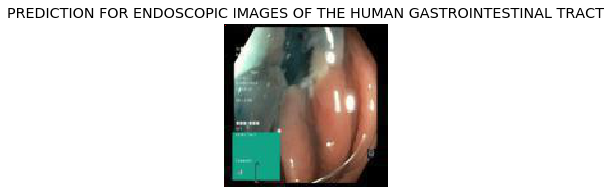

OUTPUT - dyed-resection-margins



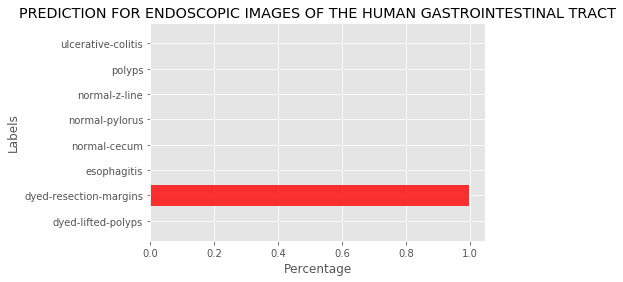

OUTPUT - dyed-resection-margins



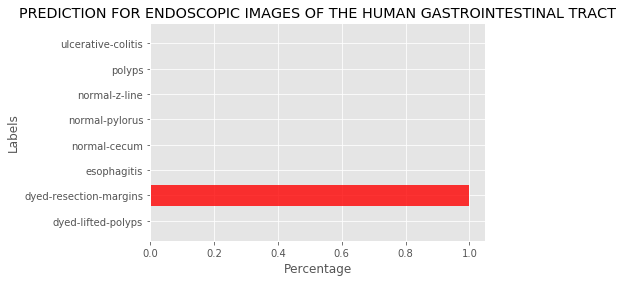

ACTUAL LABEL - dyed-resection-margins2.jpg



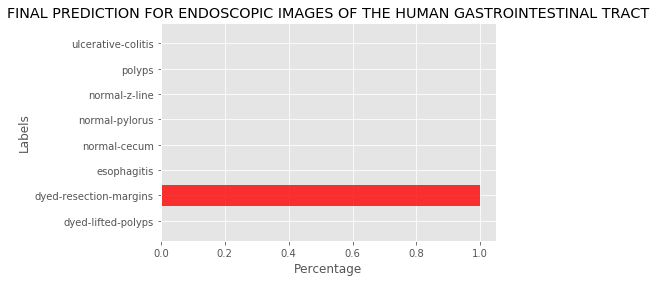

THE FINAL OUTPUT - dyed-resection-margins
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - dyed-resection-margins1.jpg
OUTPUT - dyed-resection-margins



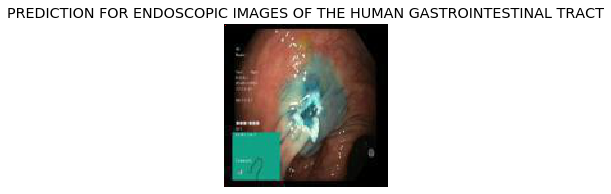

OUTPUT - dyed-resection-margins



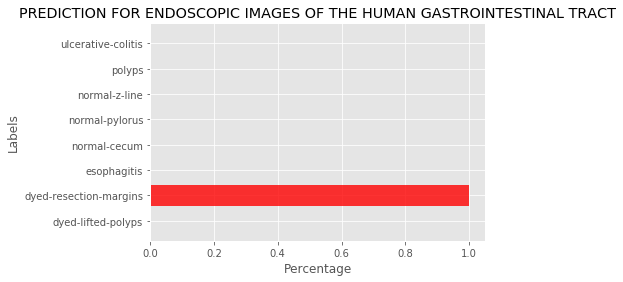

OUTPUT - dyed-resection-margins



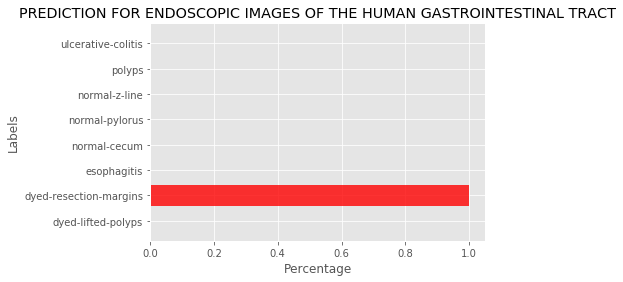

ACTUAL LABEL - dyed-resection-margins1.jpg



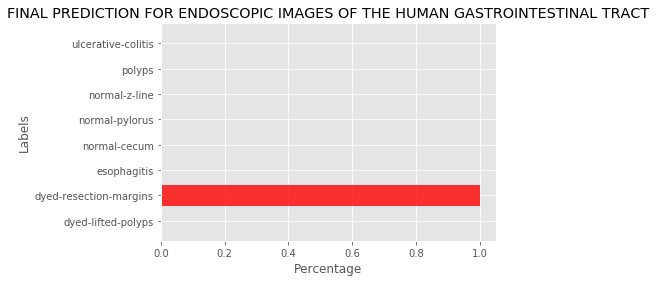

THE FINAL OUTPUT - dyed-resection-margins
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - dyed-lifted-polyps4.jpg
OUTPUT - dyed-lifted-polyps



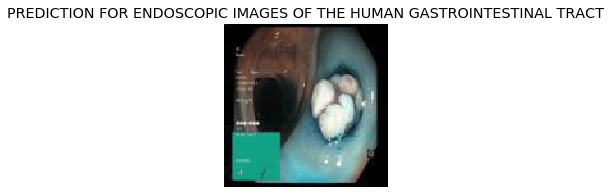

OUTPUT - dyed-lifted-polyps



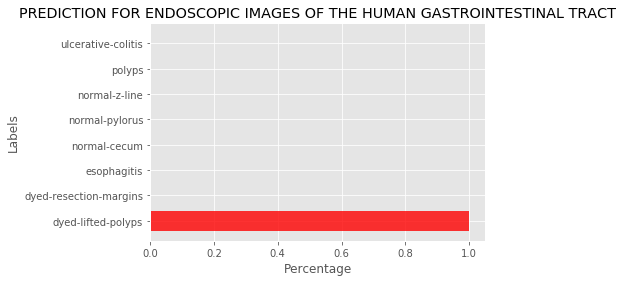

OUTPUT - dyed-lifted-polyps



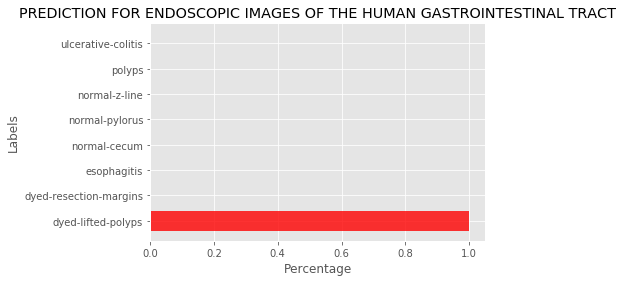

ACTUAL LABEL - dyed-lifted-polyps4.jpg



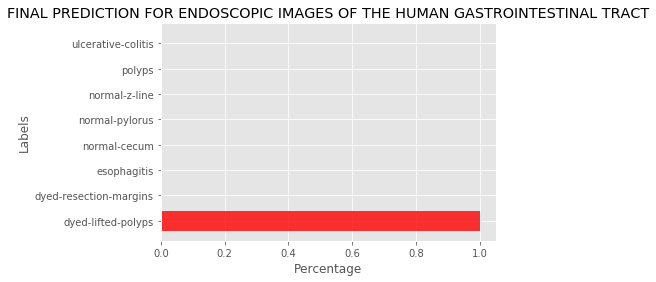

THE FINAL OUTPUT - dyed-lifted-polyps
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - dyed-resection-margins.jpg
OUTPUT - dyed-resection-margins



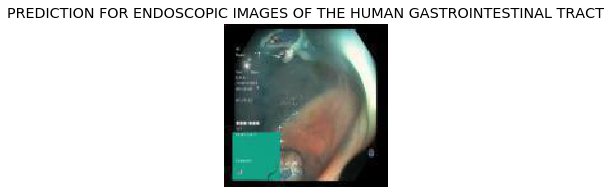

OUTPUT - dyed-resection-margins



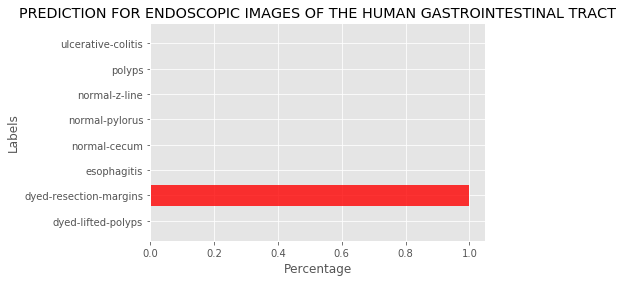

OUTPUT - dyed-resection-margins



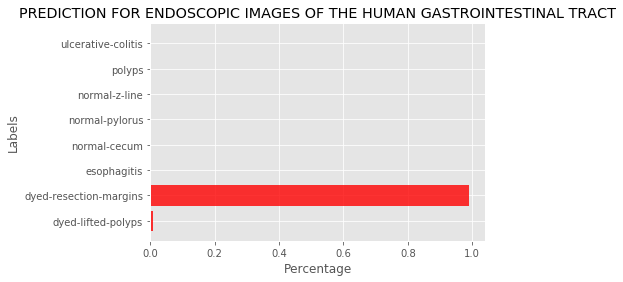

ACTUAL LABEL - dyed-resection-margins.jpg



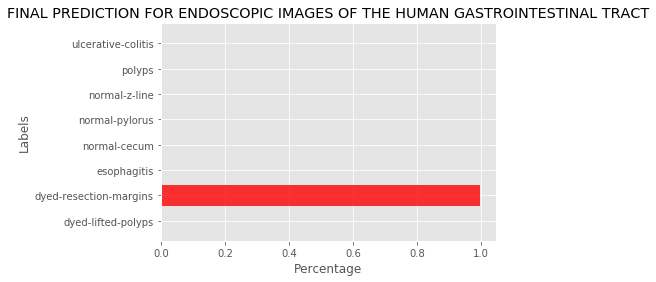

THE FINAL OUTPUT - dyed-resection-margins
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - dyed-resection-margins5.jpg
OUTPUT - dyed-resection-margins



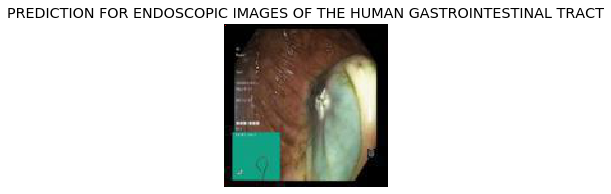

OUTPUT - dyed-resection-margins



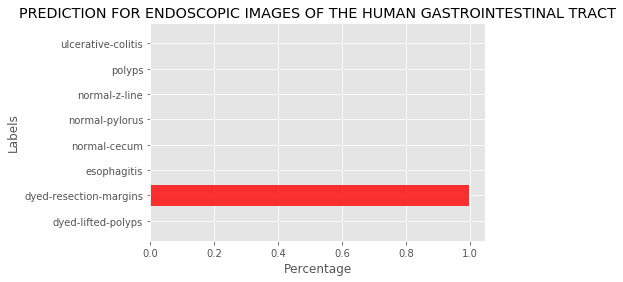

OUTPUT - dyed-resection-margins



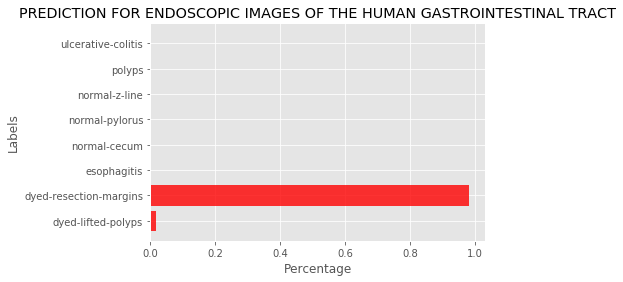

ACTUAL LABEL - dyed-resection-margins5.jpg



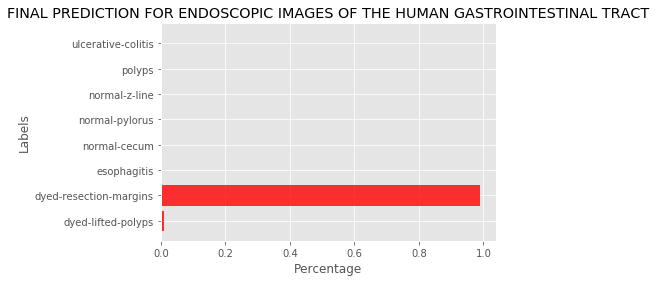

THE FINAL OUTPUT - dyed-resection-margins
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - dyed-resection-margins4.jpg
OUTPUT - dyed-lifted-polyps



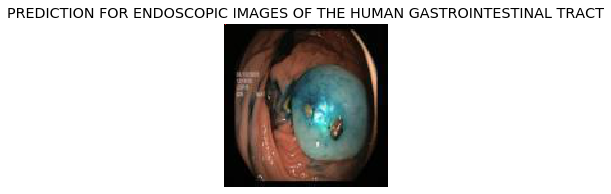

OUTPUT - dyed-resection-margins



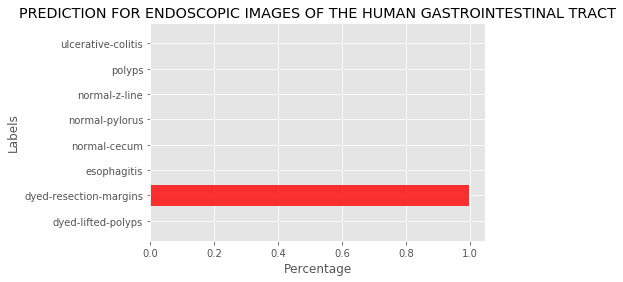

OUTPUT - dyed-resection-margins



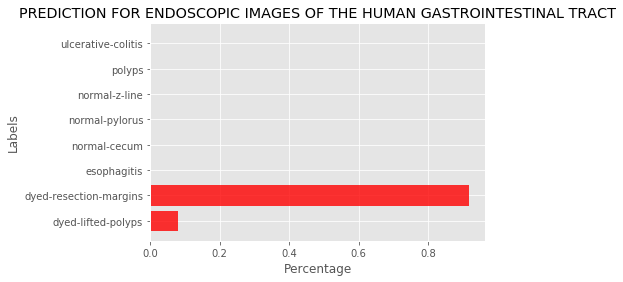

ACTUAL LABEL - dyed-resection-margins4.jpg



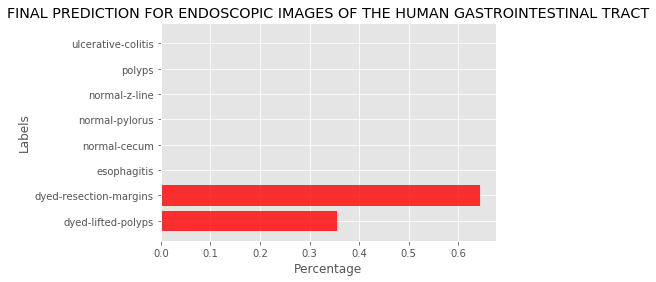

THE FINAL OUTPUT - dyed-resection-margins
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - dyed-resection-margins3.jpg
OUTPUT - dyed-resection-margins



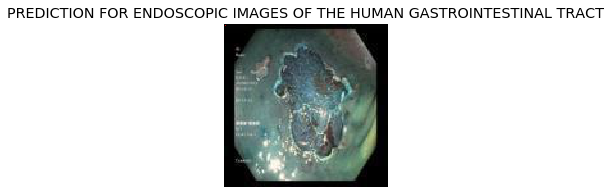

OUTPUT - dyed-resection-margins



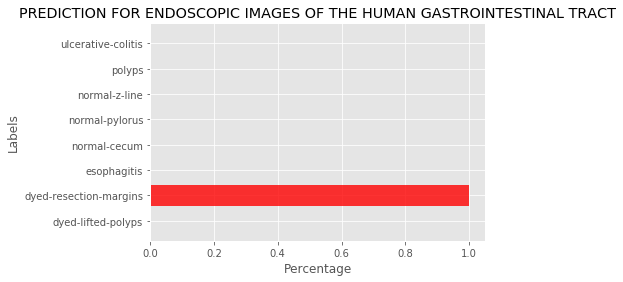

OUTPUT - dyed-resection-margins



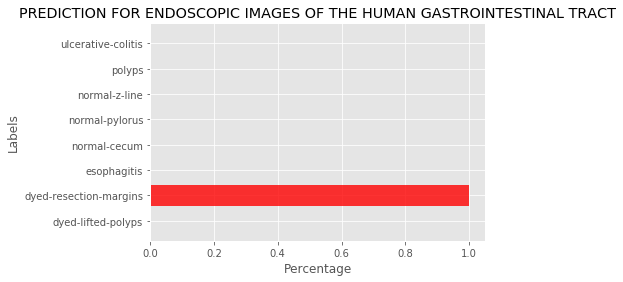

ACTUAL LABEL - dyed-resection-margins3.jpg



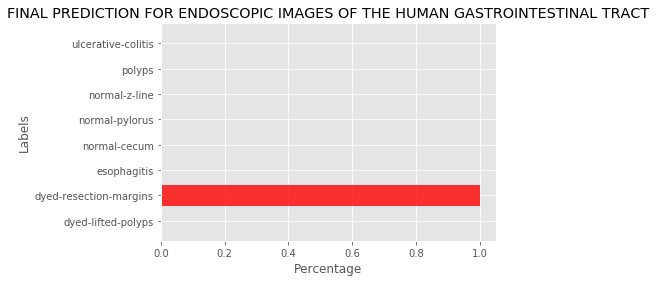

THE FINAL OUTPUT - dyed-resection-margins
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-cecum1.jpg
OUTPUT - normal-cecum



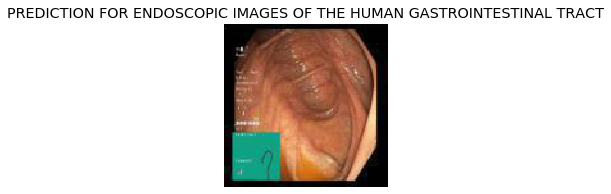

OUTPUT - normal-cecum



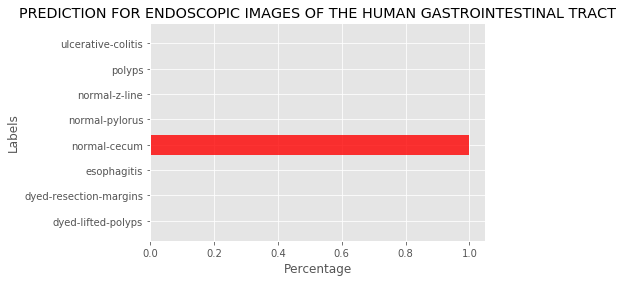

OUTPUT - normal-cecum



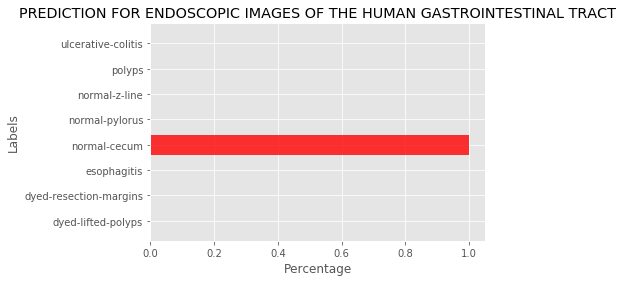

ACTUAL LABEL - normal-cecum1.jpg



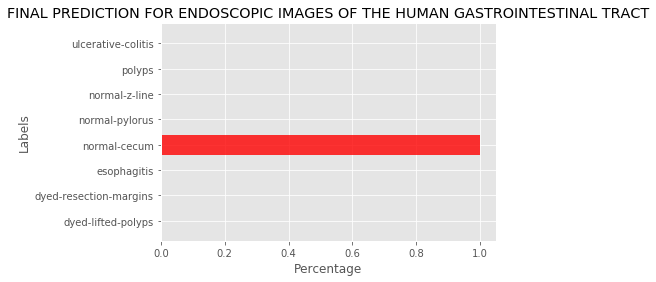

THE FINAL OUTPUT - normal-cecum
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-cecum2.jpg
OUTPUT - normal-cecum



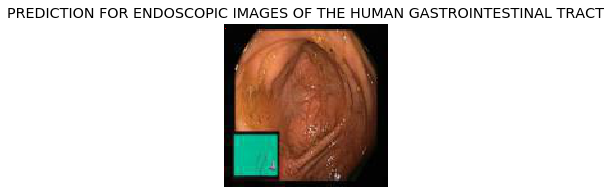

OUTPUT - normal-cecum



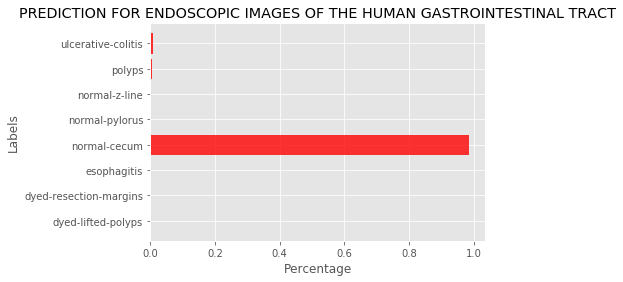

OUTPUT - normal-cecum



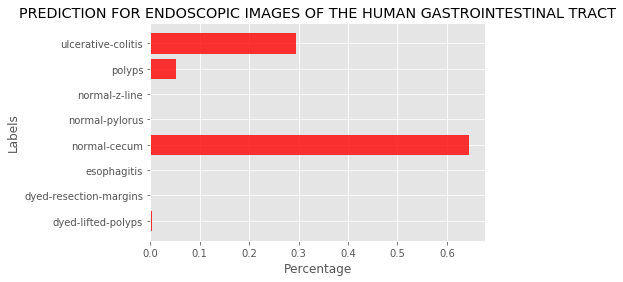

ACTUAL LABEL - normal-cecum2.jpg



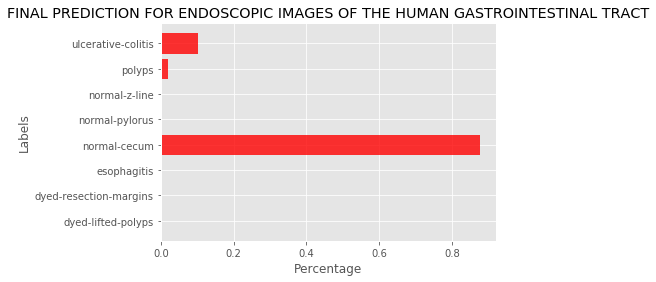

THE FINAL OUTPUT - normal-cecum
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-cecum.jpg
OUTPUT - normal-cecum



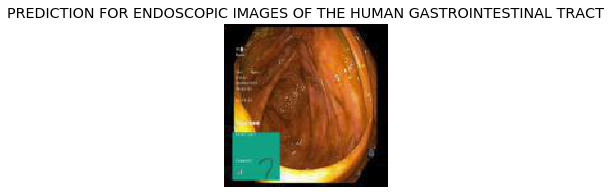

OUTPUT - normal-cecum



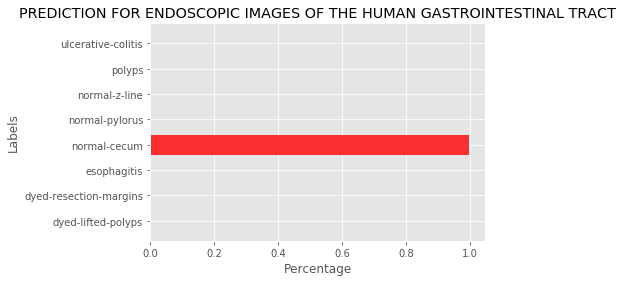

OUTPUT - normal-cecum



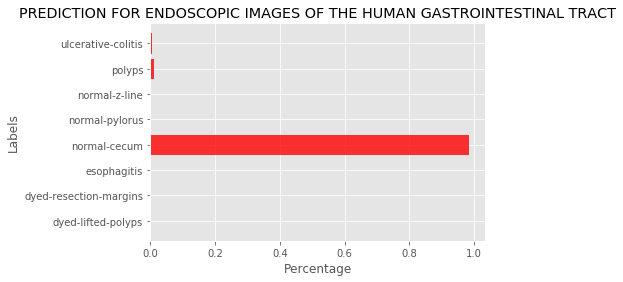

ACTUAL LABEL - normal-cecum.jpg



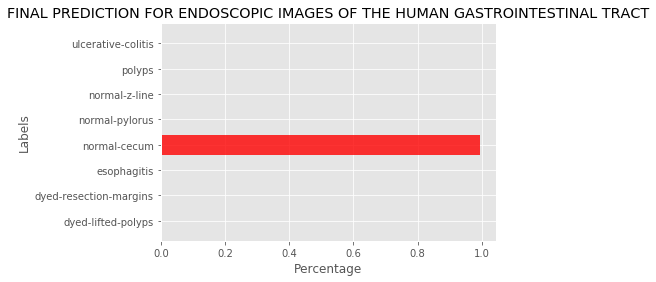

THE FINAL OUTPUT - normal-cecum
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-cecum3.jpg
OUTPUT - normal-cecum



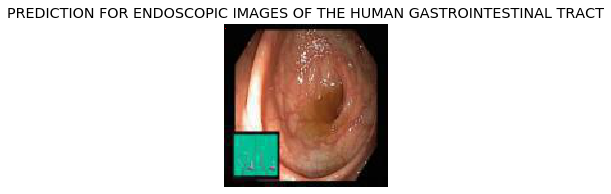

OUTPUT - normal-cecum



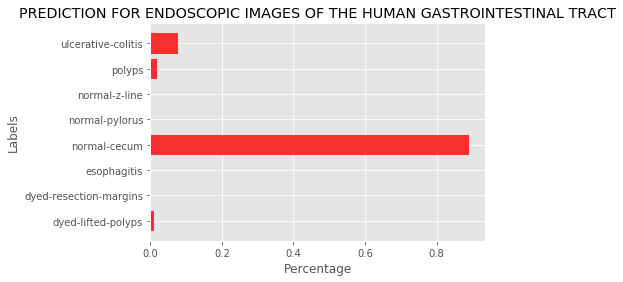

OUTPUT - ulcerative-colitis



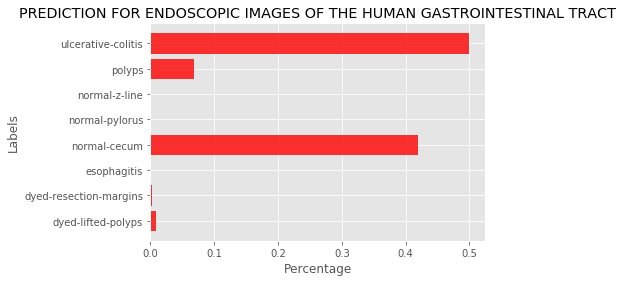

ACTUAL LABEL - normal-cecum3.jpg



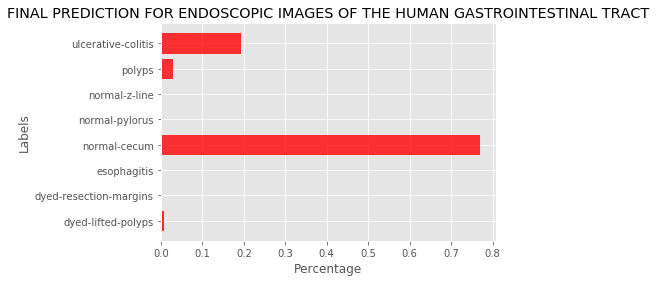

THE FINAL OUTPUT - normal-cecum
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - polyps5.jpg
OUTPUT - polyps



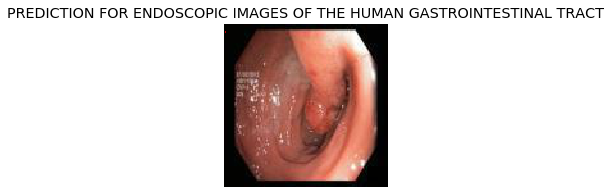

OUTPUT - polyps



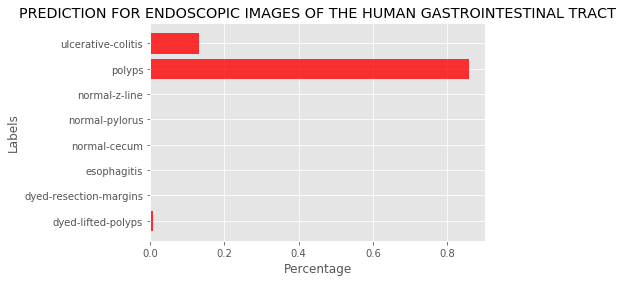

OUTPUT - ulcerative-colitis



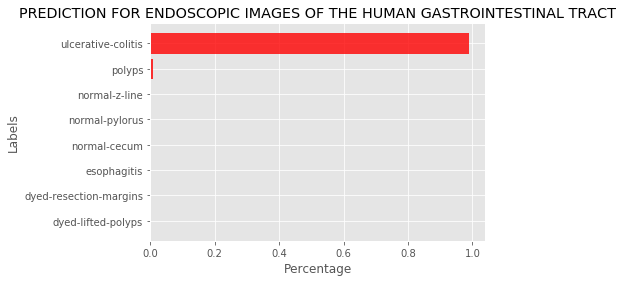

ACTUAL LABEL - polyps5.jpg



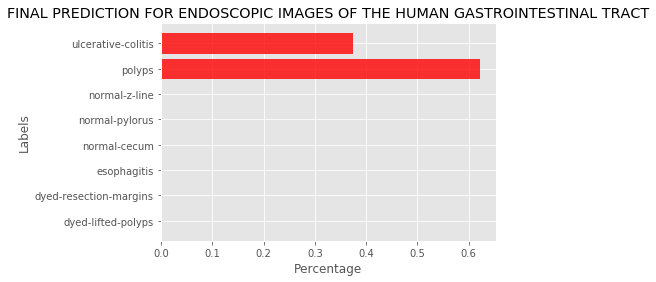

THE FINAL OUTPUT - polyps
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - polyps2.jpg
OUTPUT - ulcerative-colitis



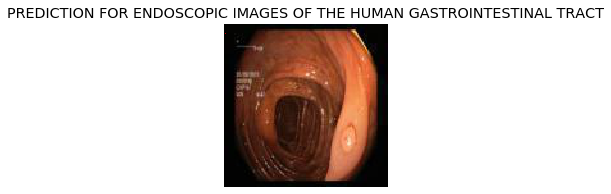

OUTPUT - polyps



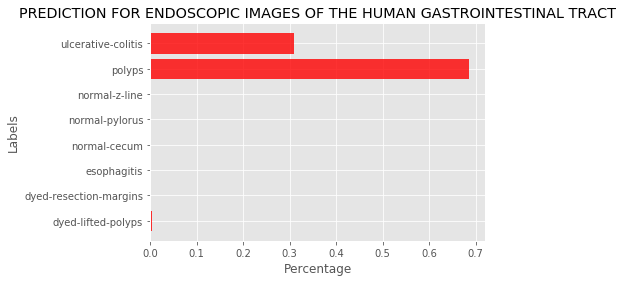

OUTPUT - ulcerative-colitis



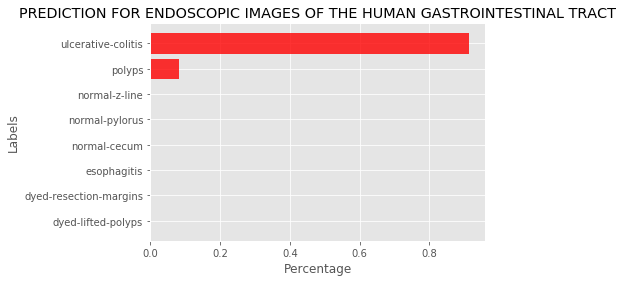

ACTUAL LABEL - polyps2.jpg



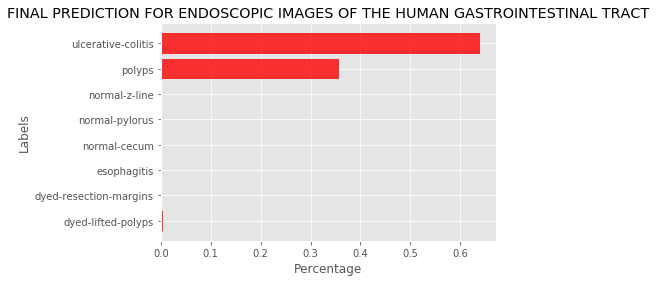

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - polyps.jpg
OUTPUT - polyps



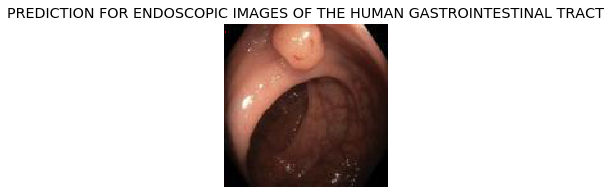

OUTPUT - polyps



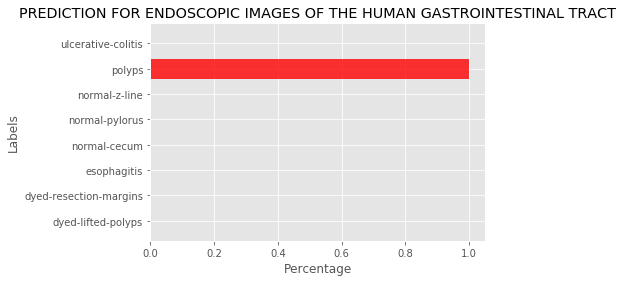

OUTPUT - polyps



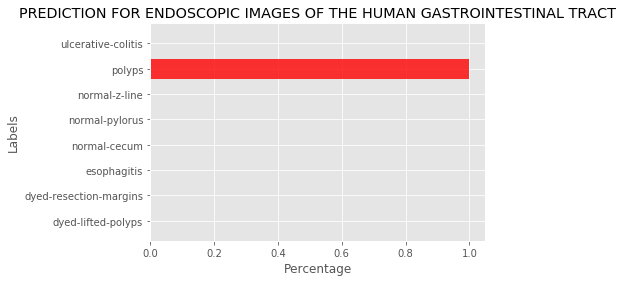

ACTUAL LABEL - polyps.jpg



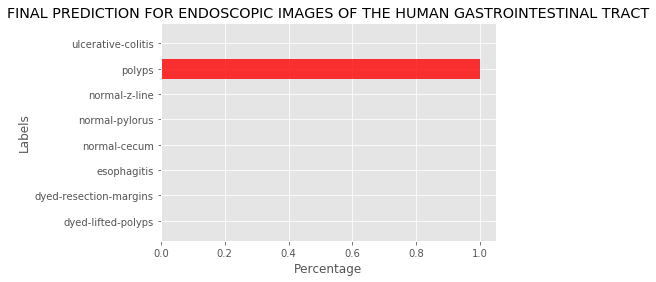

THE FINAL OUTPUT - polyps
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - polyps1.jpg
OUTPUT - polyps



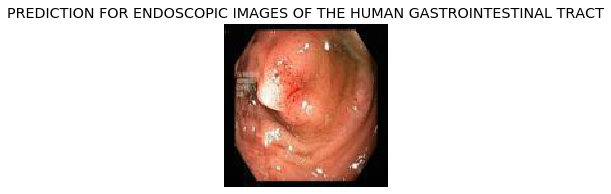

OUTPUT - polyps



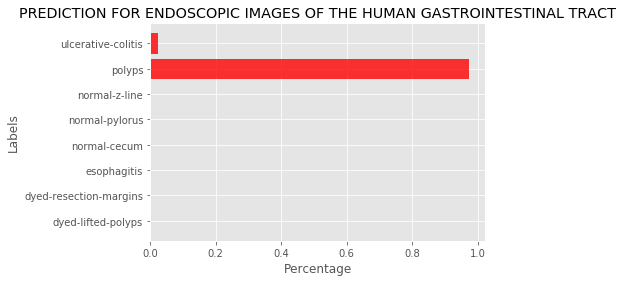

OUTPUT - polyps



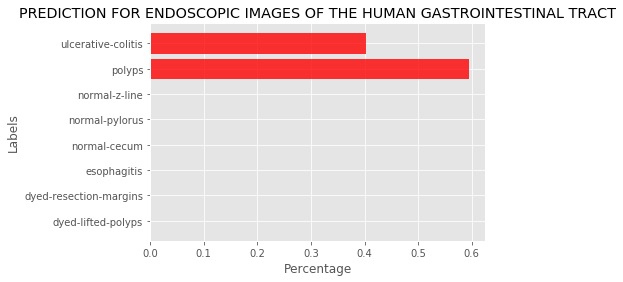

ACTUAL LABEL - polyps1.jpg



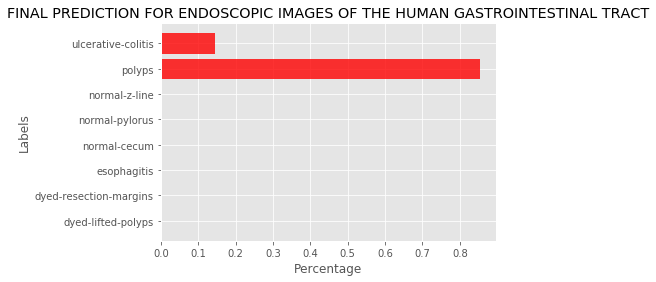

THE FINAL OUTPUT - polyps
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-cecum4.jpg
OUTPUT - normal-cecum



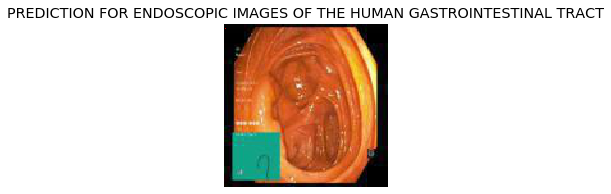

OUTPUT - normal-cecum



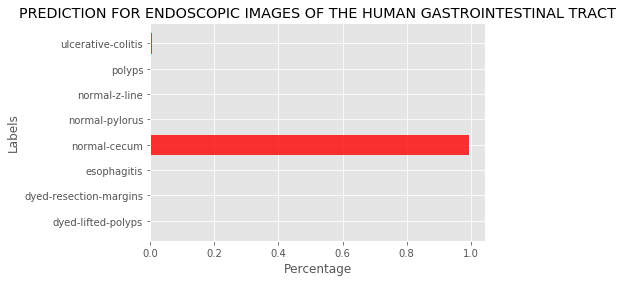

OUTPUT - normal-cecum



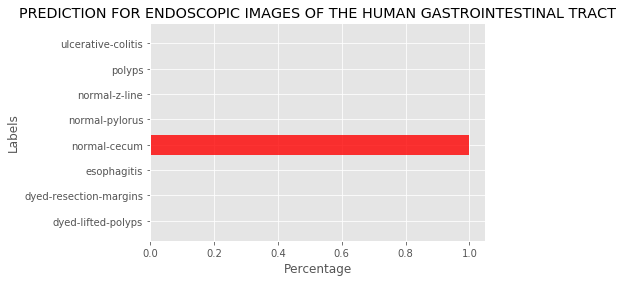

ACTUAL LABEL - normal-cecum4.jpg



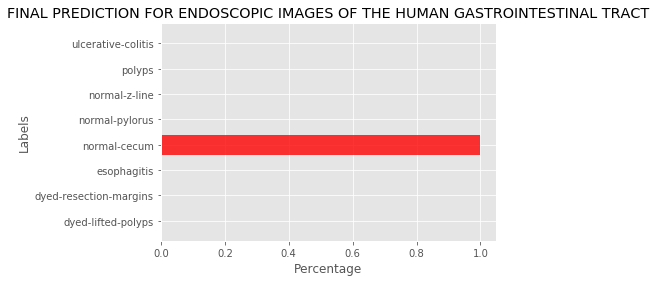

THE FINAL OUTPUT - normal-cecum
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - polyps3.jpg
OUTPUT - ulcerative-colitis



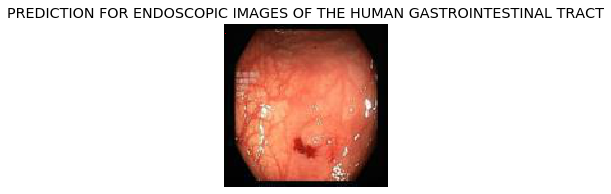

OUTPUT - normal-cecum



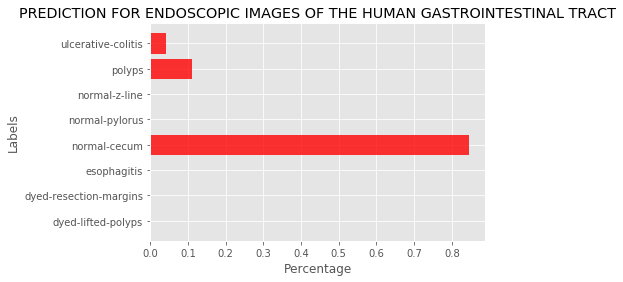

OUTPUT - ulcerative-colitis



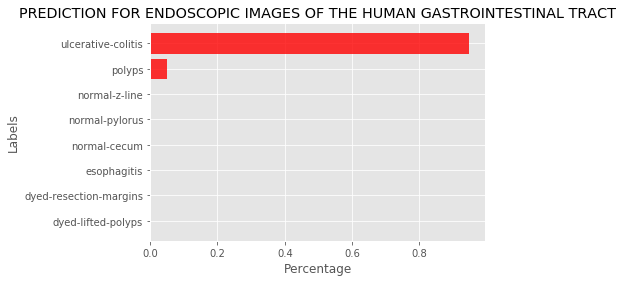

ACTUAL LABEL - polyps3.jpg



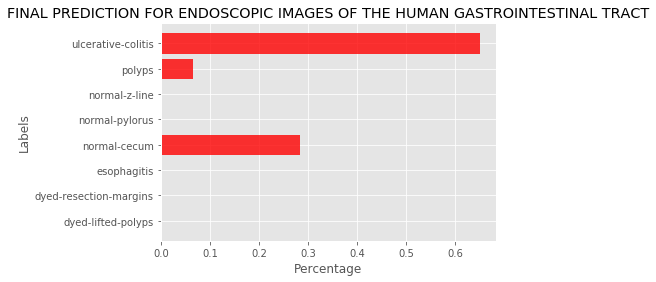

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - ulcerative-colitis2.jpg
OUTPUT - ulcerative-colitis



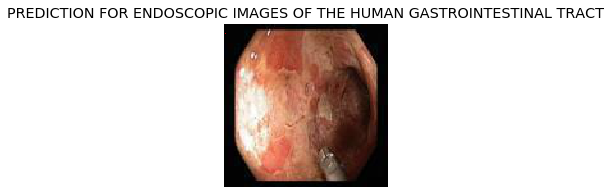

OUTPUT - ulcerative-colitis



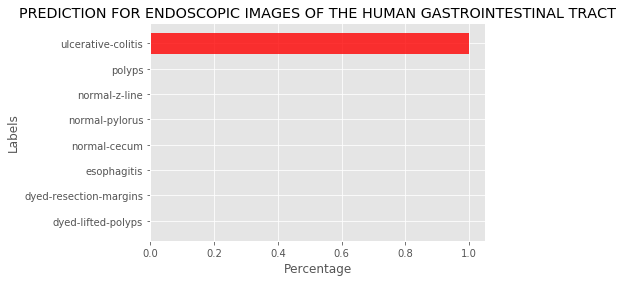

OUTPUT - ulcerative-colitis



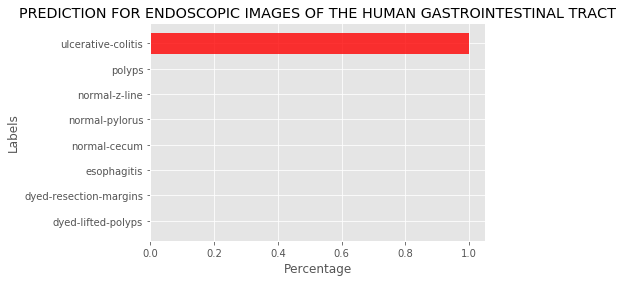

ACTUAL LABEL - ulcerative-colitis2.jpg



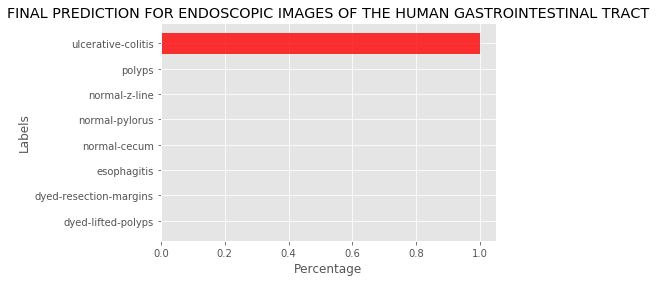

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - ulcerative-colitis.jpg
OUTPUT - ulcerative-colitis



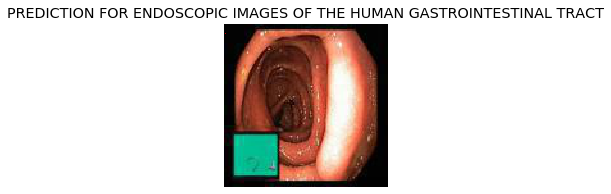

OUTPUT - ulcerative-colitis



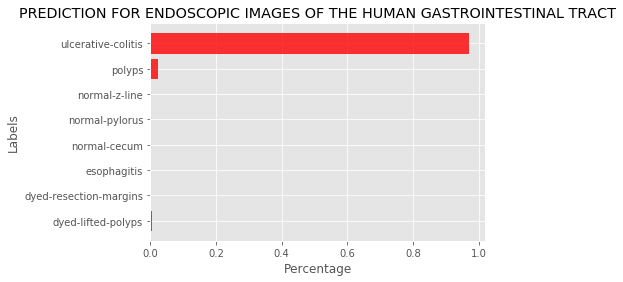

OUTPUT - ulcerative-colitis



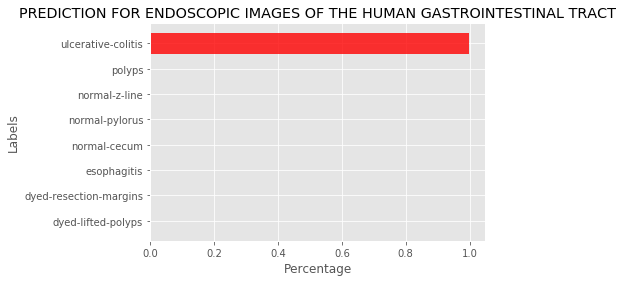

ACTUAL LABEL - ulcerative-colitis.jpg



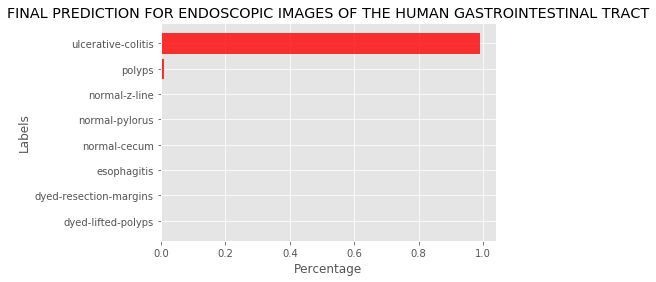

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-cecum5.jpg
OUTPUT - normal-cecum



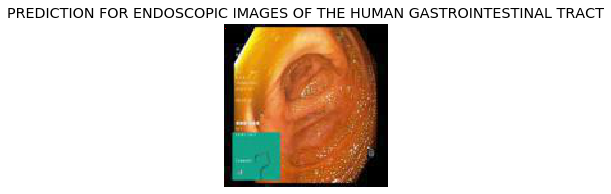

OUTPUT - normal-cecum



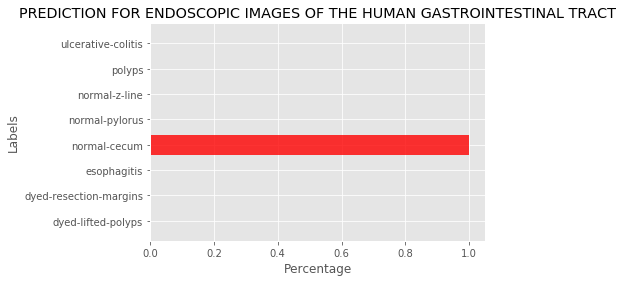

OUTPUT - normal-cecum



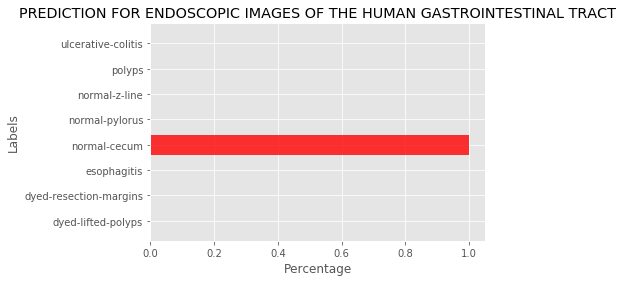

ACTUAL LABEL - normal-cecum5.jpg



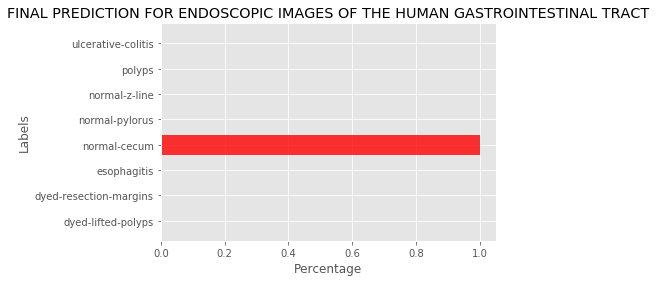

THE FINAL OUTPUT - normal-cecum
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-z-line2.jpg
OUTPUT - normal-z-line



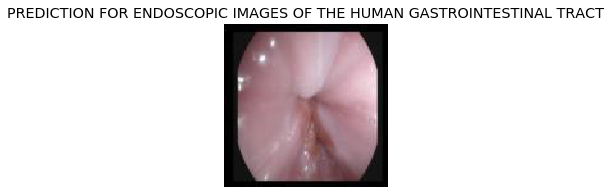

OUTPUT - normal-z-line



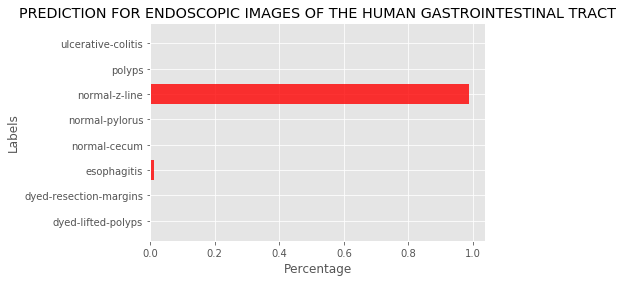

OUTPUT - normal-z-line



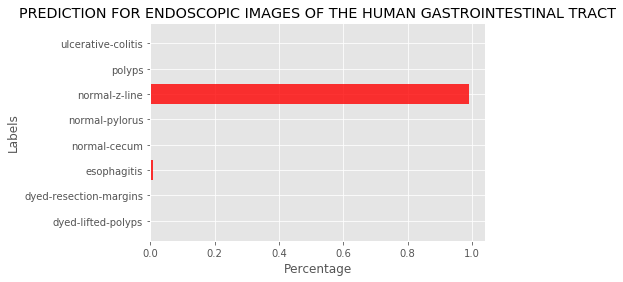

ACTUAL LABEL - normal-z-line2.jpg



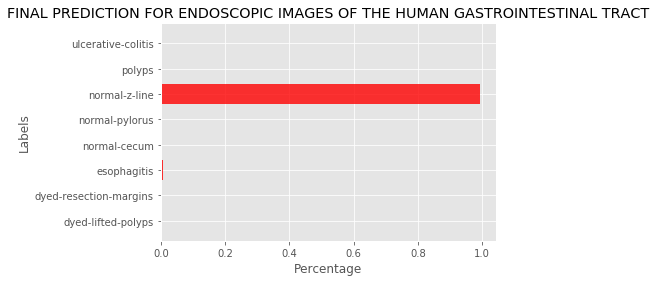

THE FINAL OUTPUT - normal-z-line
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - polyps4.jpg
OUTPUT - polyps



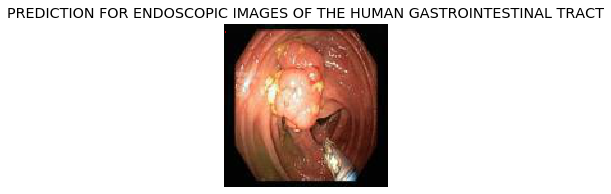

OUTPUT - polyps



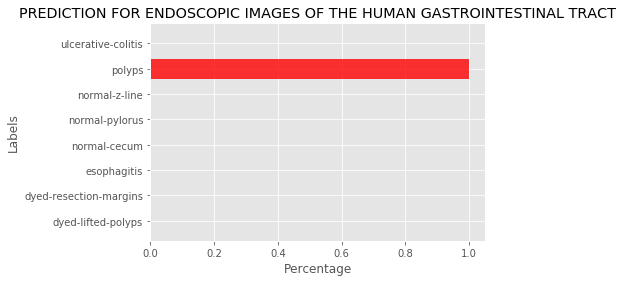

OUTPUT - polyps



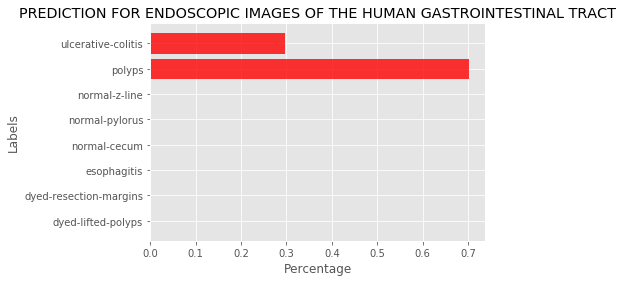

ACTUAL LABEL - polyps4.jpg



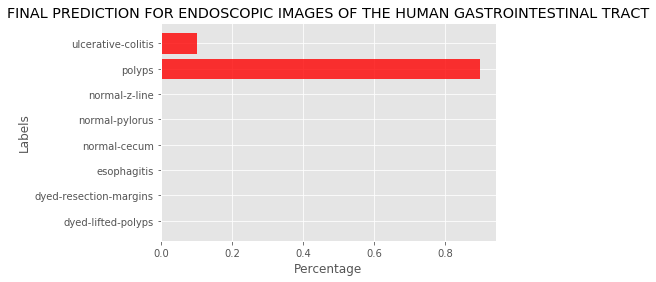

THE FINAL OUTPUT - polyps
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - ulcerative-colitis1.jpg
OUTPUT - ulcerative-colitis



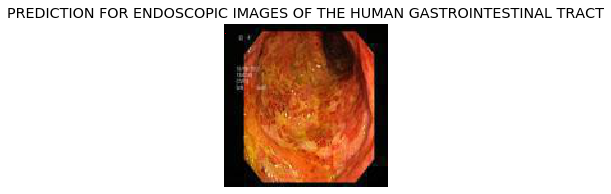

OUTPUT - ulcerative-colitis



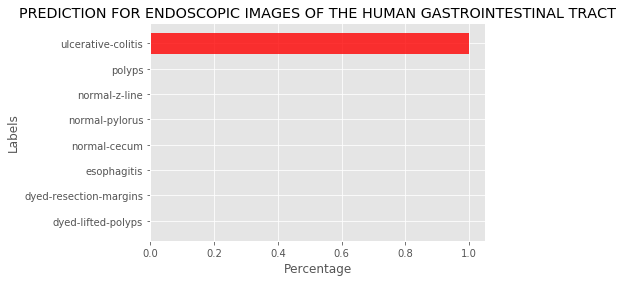

OUTPUT - ulcerative-colitis



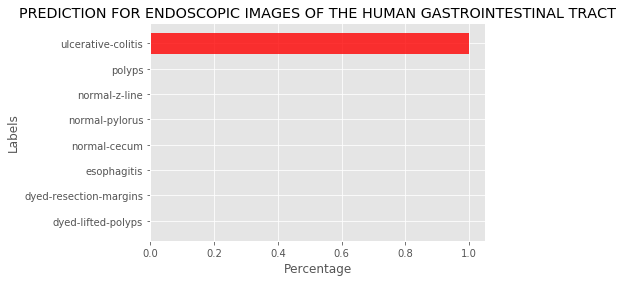

ACTUAL LABEL - ulcerative-colitis1.jpg



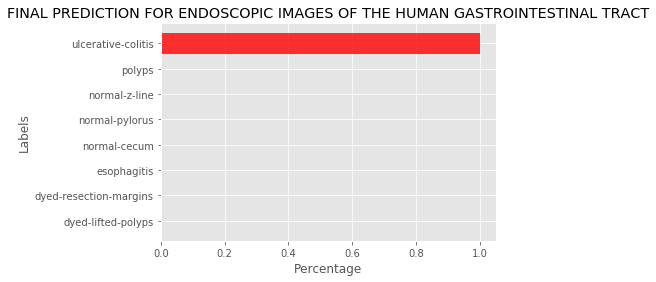

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - ulcerative-colitis5.jpg
OUTPUT - ulcerative-colitis



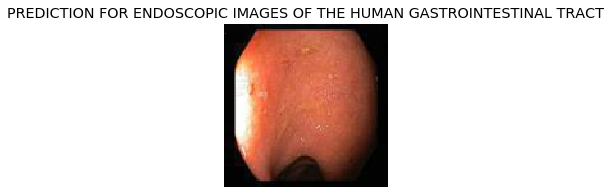

OUTPUT - ulcerative-colitis



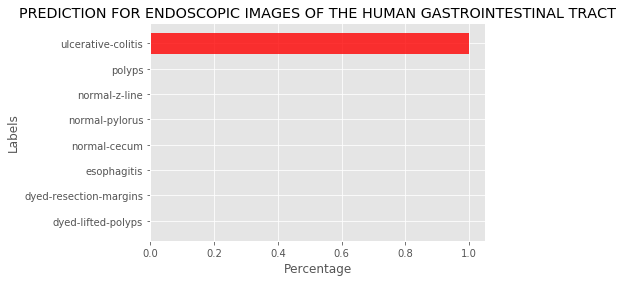

OUTPUT - ulcerative-colitis



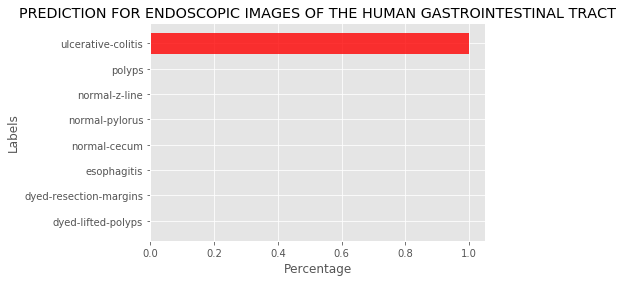

ACTUAL LABEL - ulcerative-colitis5.jpg



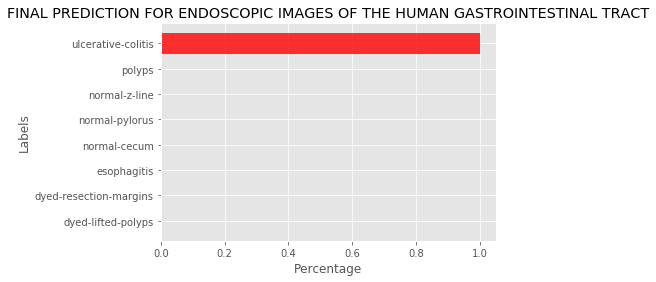

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - ulcerative-colitis3.jpg
OUTPUT - ulcerative-colitis



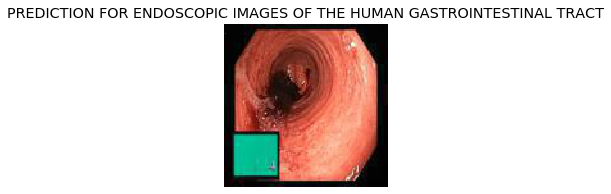

OUTPUT - ulcerative-colitis



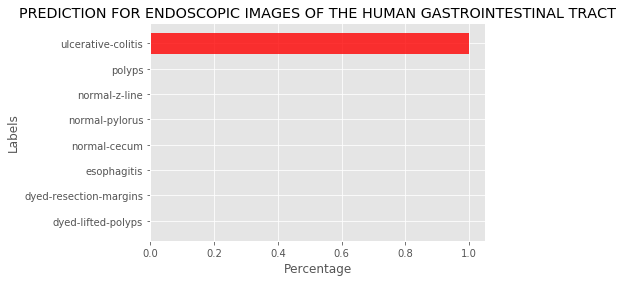

OUTPUT - ulcerative-colitis



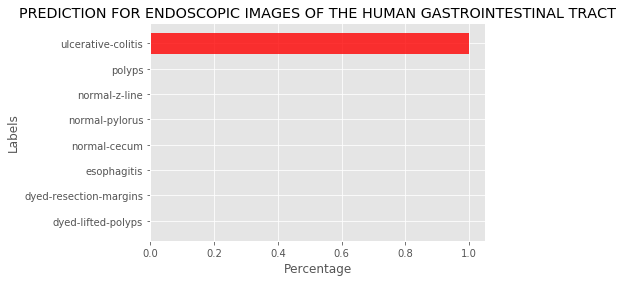

ACTUAL LABEL - ulcerative-colitis3.jpg



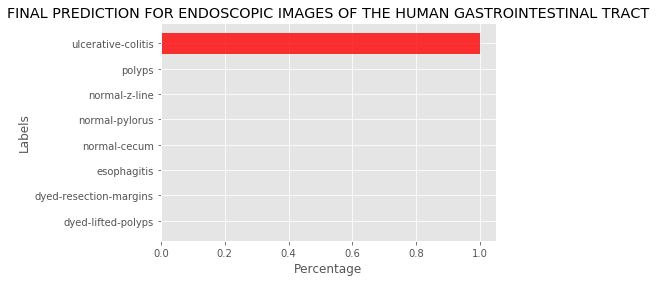

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - ulcerative-colitis4.jpg
OUTPUT - ulcerative-colitis



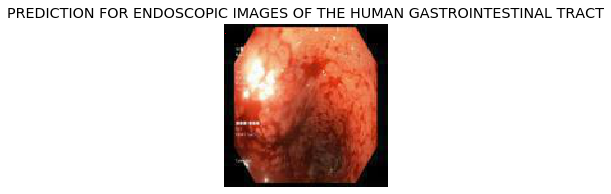

OUTPUT - ulcerative-colitis



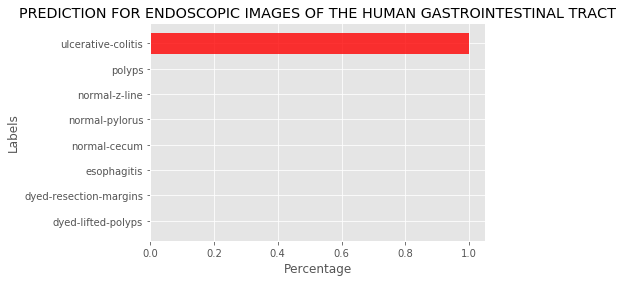

OUTPUT - ulcerative-colitis



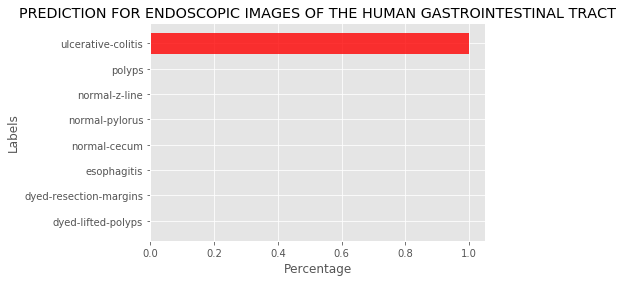

ACTUAL LABEL - ulcerative-colitis4.jpg



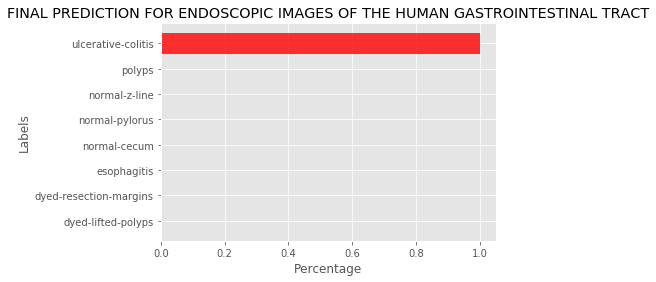

THE FINAL OUTPUT - ulcerative-colitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - esophagitis1.jpg
OUTPUT - esophagitis



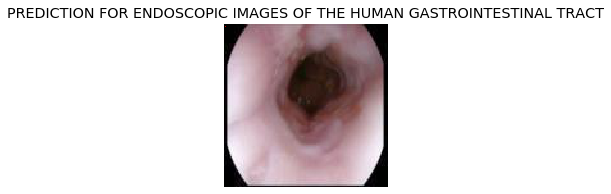

OUTPUT - esophagitis



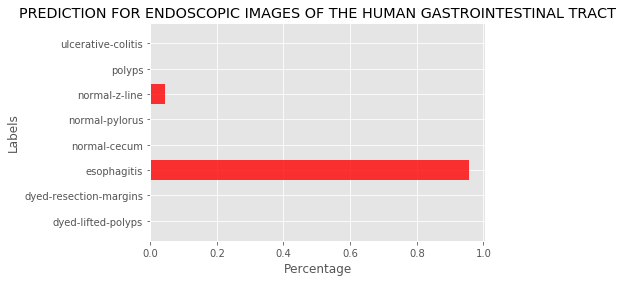

OUTPUT - esophagitis



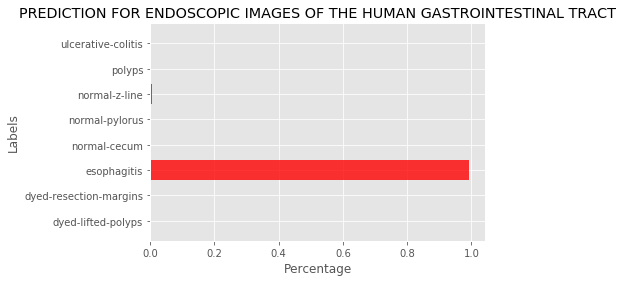

ACTUAL LABEL - esophagitis1.jpg



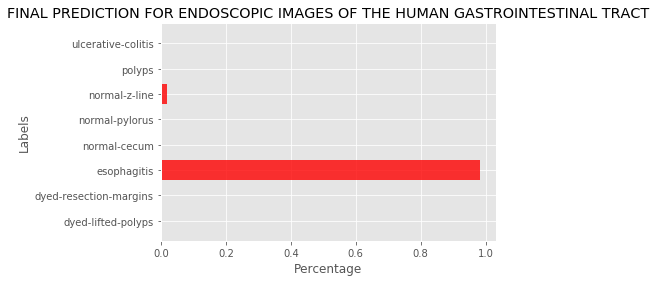

THE FINAL OUTPUT - esophagitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - esophagitis2.jpg
OUTPUT - esophagitis



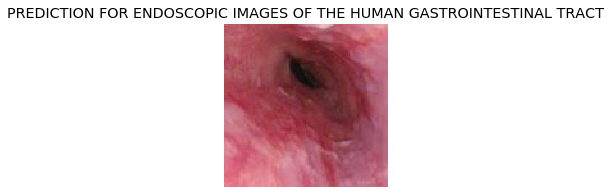

OUTPUT - esophagitis



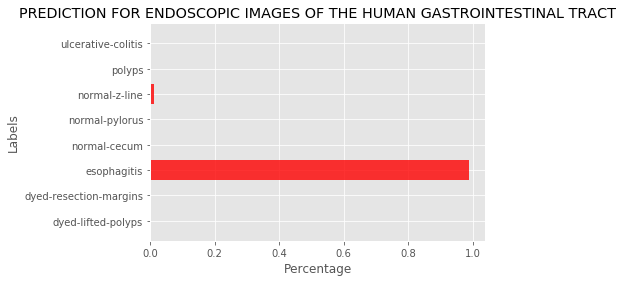

OUTPUT - esophagitis



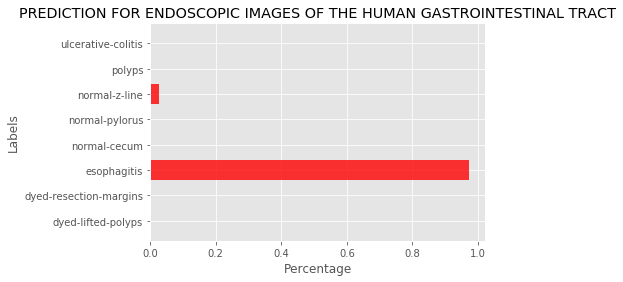

ACTUAL LABEL - esophagitis2.jpg



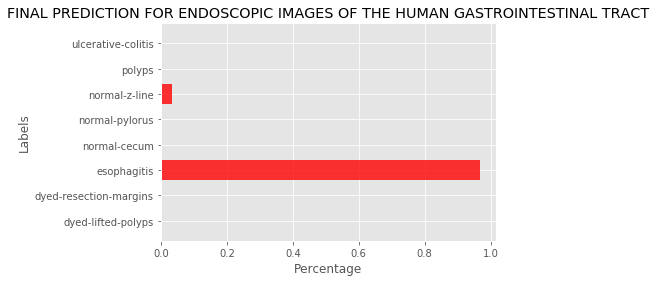

THE FINAL OUTPUT - esophagitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-pylorus3.jpg
OUTPUT - normal-pylorus



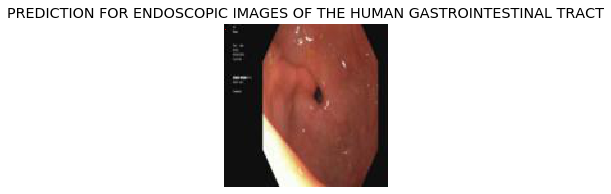

OUTPUT - normal-pylorus



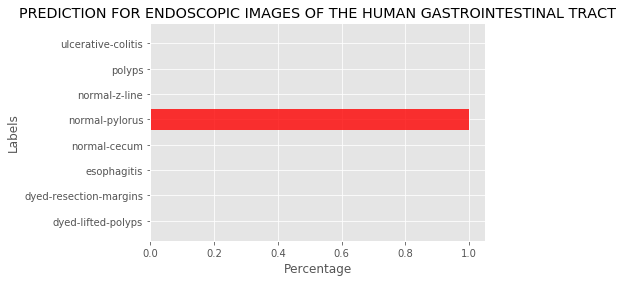

OUTPUT - normal-pylorus



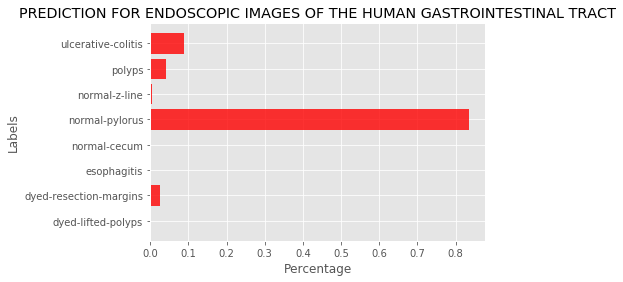

ACTUAL LABEL - normal-pylorus3.jpg



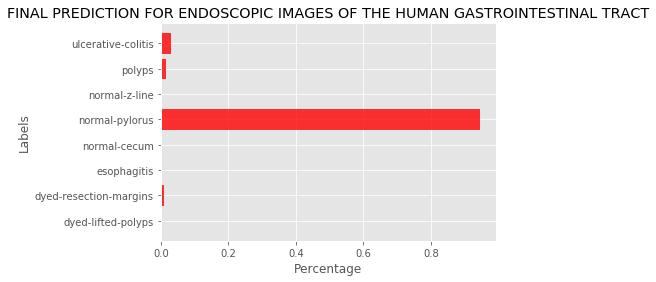

THE FINAL OUTPUT - normal-pylorus
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - esophagitis5.jpg
OUTPUT - esophagitis



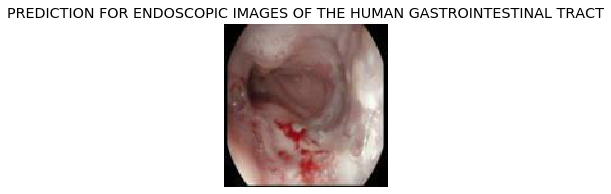

OUTPUT - esophagitis



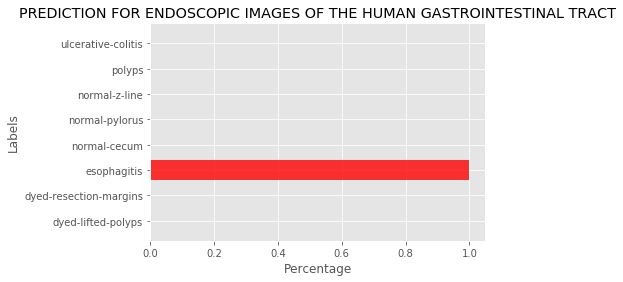

OUTPUT - esophagitis



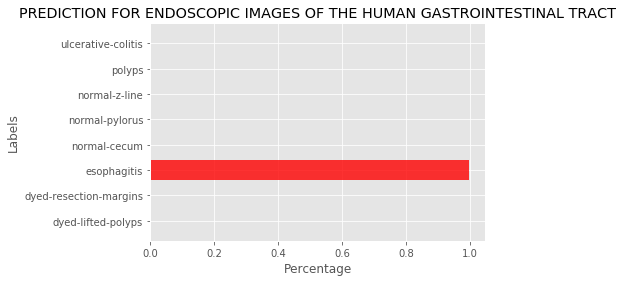

ACTUAL LABEL - esophagitis5.jpg



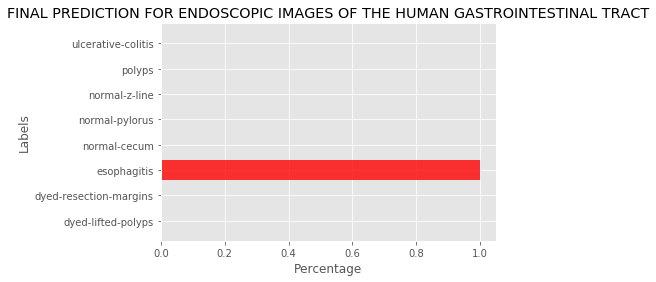

THE FINAL OUTPUT - esophagitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-pylorus.jpg
OUTPUT - normal-pylorus



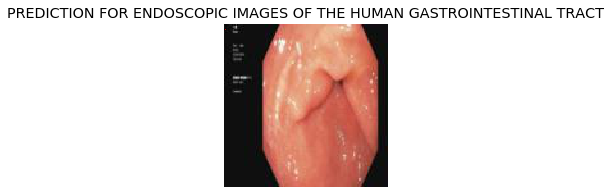

OUTPUT - normal-pylorus



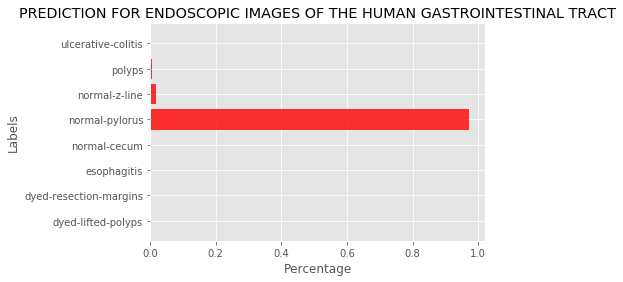

OUTPUT - ulcerative-colitis



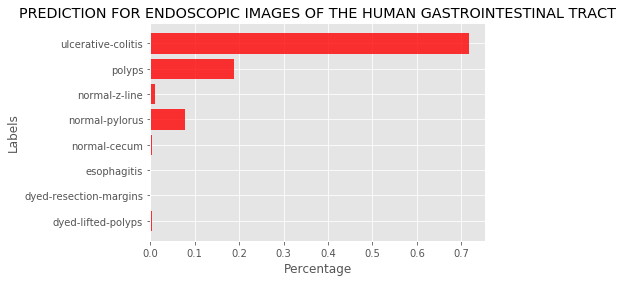

ACTUAL LABEL - normal-pylorus.jpg



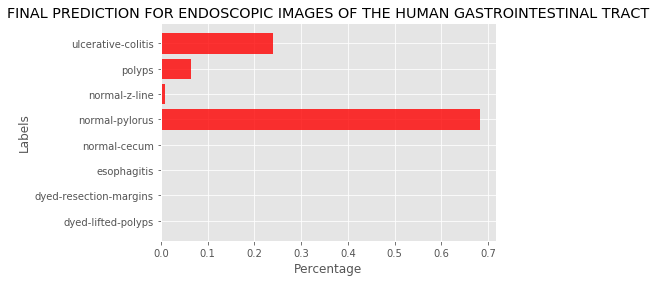

THE FINAL OUTPUT - normal-pylorus
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - esophagitis4.jpg
OUTPUT - esophagitis



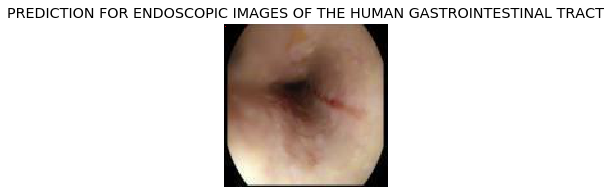

OUTPUT - esophagitis



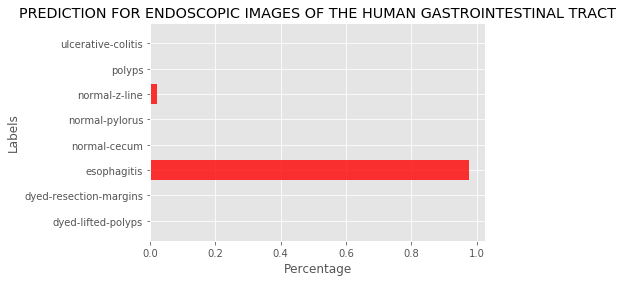

OUTPUT - esophagitis



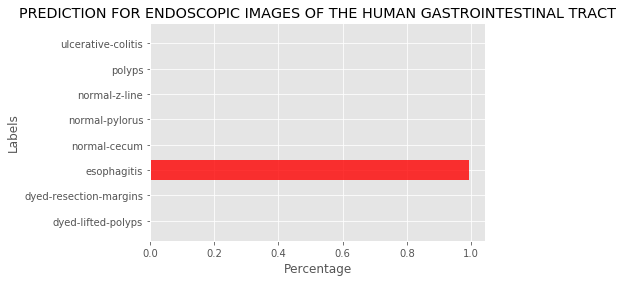

ACTUAL LABEL - esophagitis4.jpg



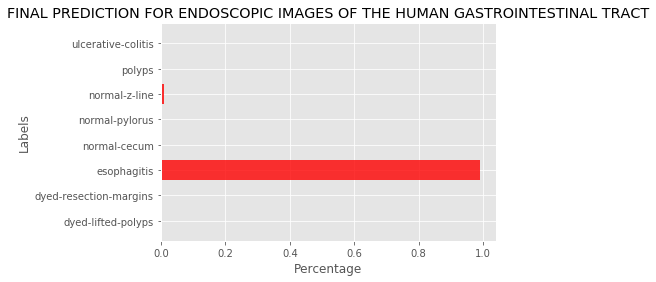

THE FINAL OUTPUT - esophagitis


--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-z-line1.jpg
OUTPUT - normal-z-line



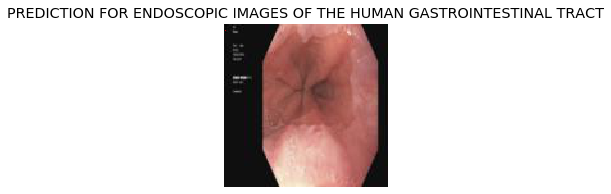

OUTPUT - normal-z-line



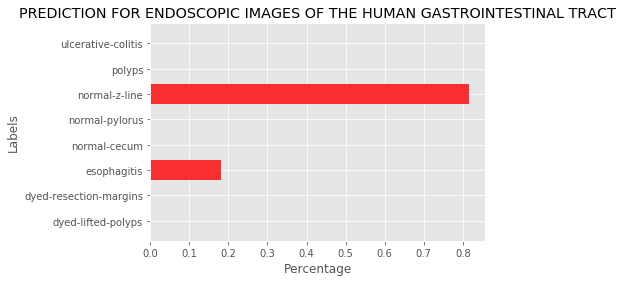

OUTPUT - esophagitis



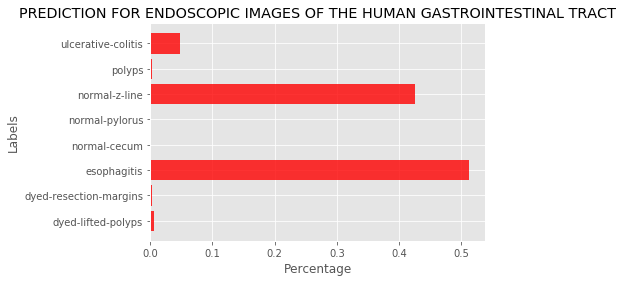

ACTUAL LABEL - normal-z-line1.jpg



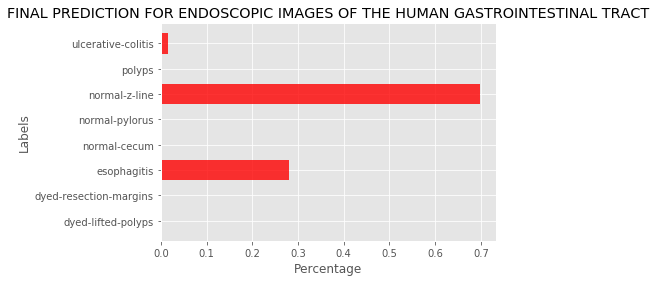

THE FINAL OUTPUT - normal-z-line
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - esophagitis.jpg
OUTPUT - esophagitis



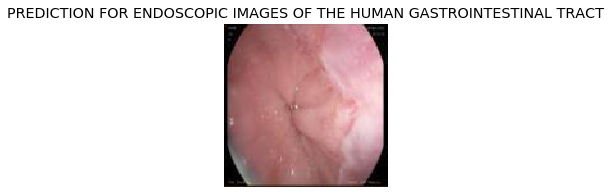

OUTPUT - normal-z-line



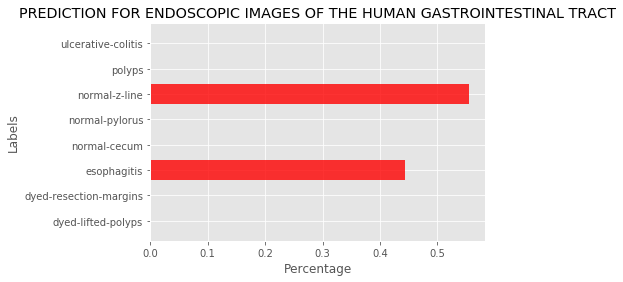

OUTPUT - esophagitis



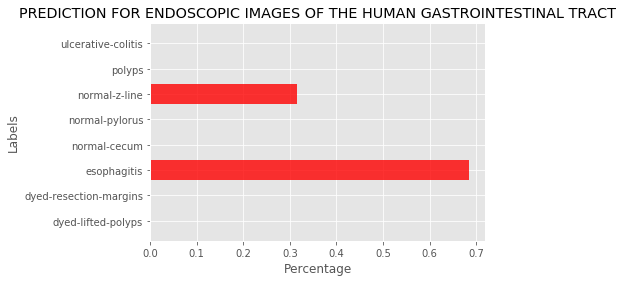

ACTUAL LABEL - esophagitis.jpg



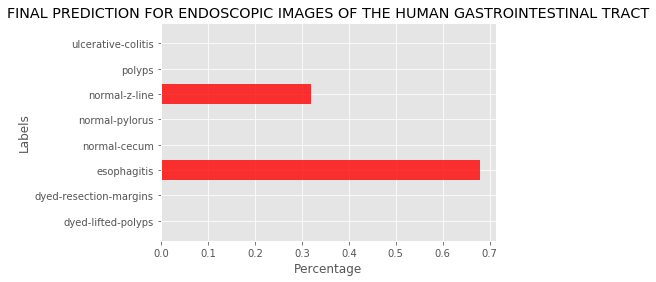

THE FINAL OUTPUT - esophagitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-z-line4.jpg
OUTPUT - normal-z-line



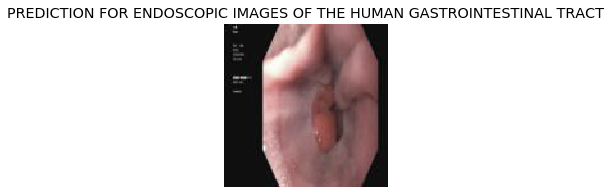

OUTPUT - normal-z-line



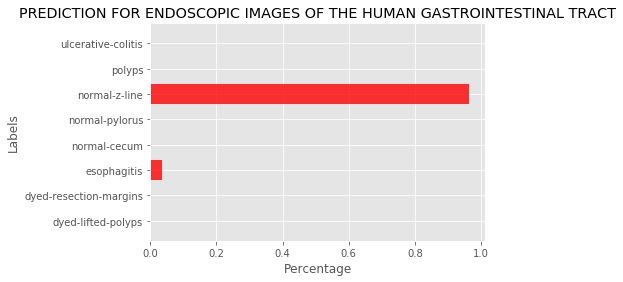

OUTPUT - esophagitis



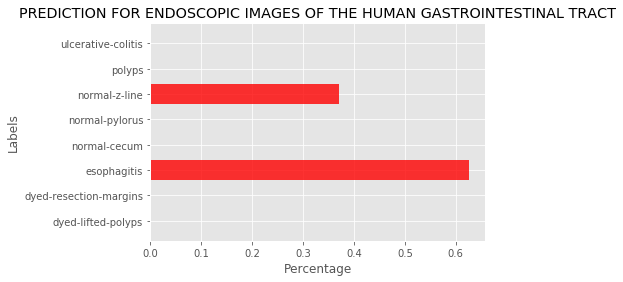

ACTUAL LABEL - normal-z-line4.jpg



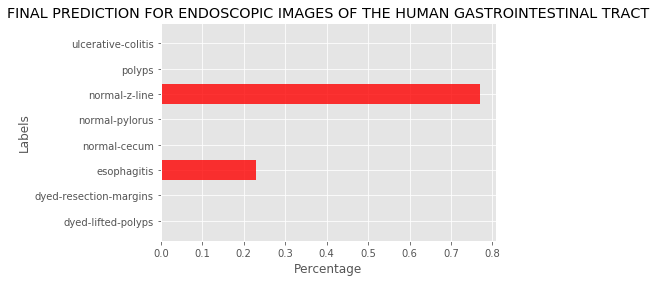

THE FINAL OUTPUT - normal-z-line
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-pylorus4.jpg
OUTPUT - normal-pylorus



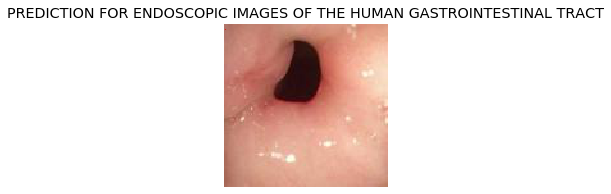

OUTPUT - normal-pylorus



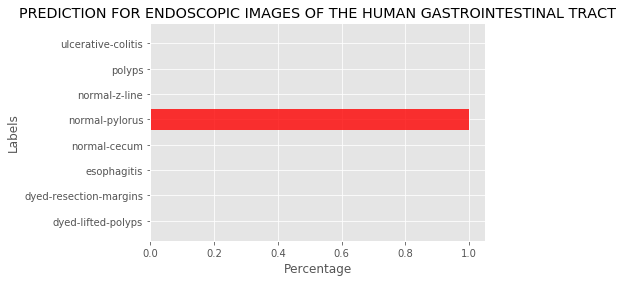

OUTPUT - normal-pylorus



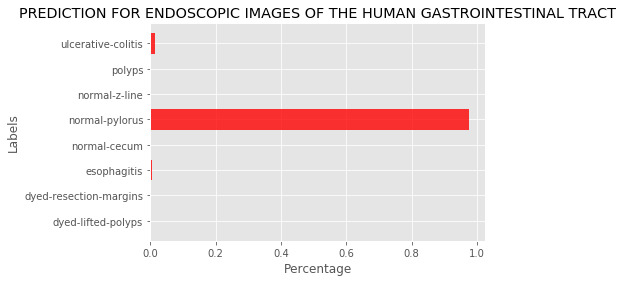

ACTUAL LABEL - normal-pylorus4.jpg



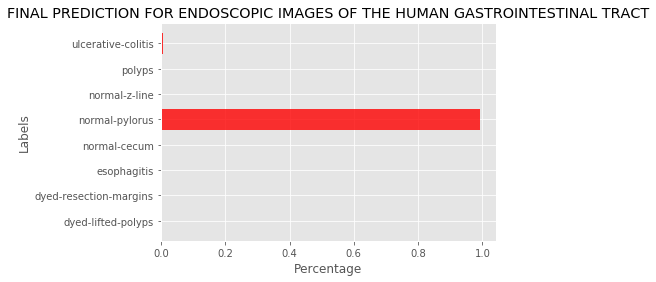

THE FINAL OUTPUT - normal-pylorus
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-z-line3.jpg
OUTPUT - normal-z-line



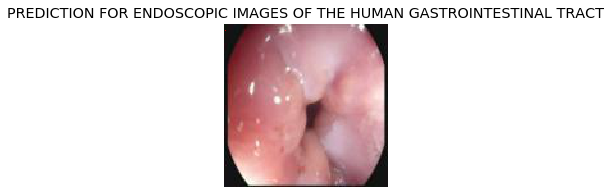

OUTPUT - normal-z-line



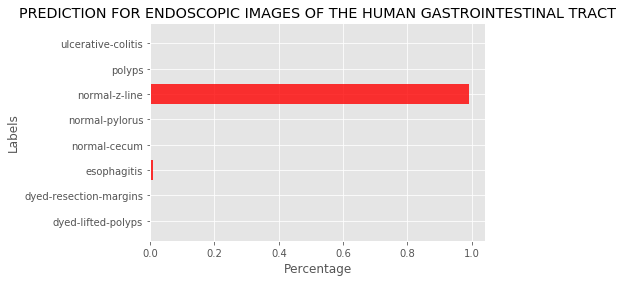

OUTPUT - normal-z-line



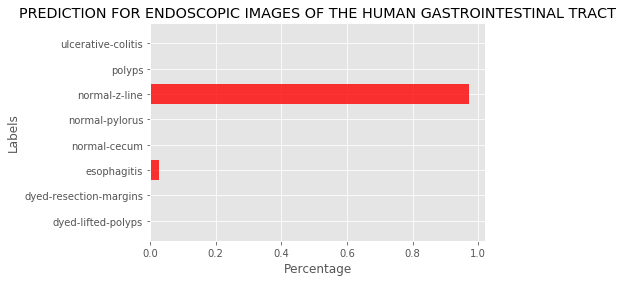

ACTUAL LABEL - normal-z-line3.jpg



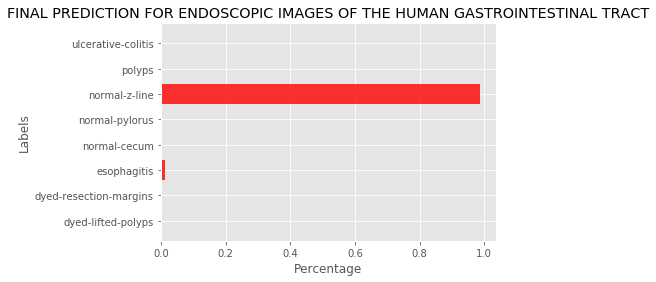

THE FINAL OUTPUT - normal-z-line
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-z-line.jpg
OUTPUT - normal-z-line



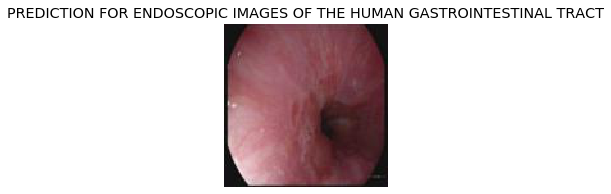

OUTPUT - esophagitis



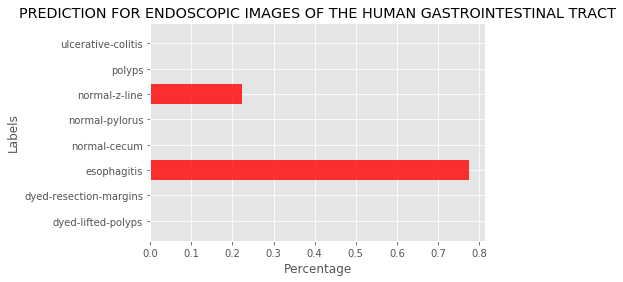

OUTPUT - esophagitis



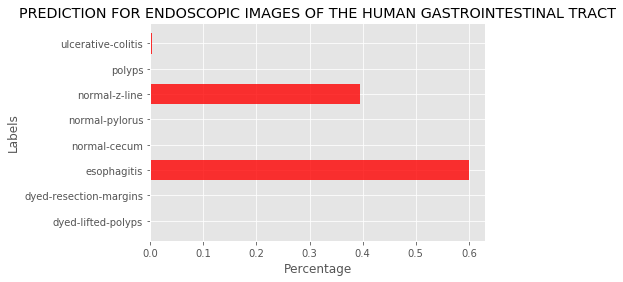

ACTUAL LABEL - normal-z-line.jpg



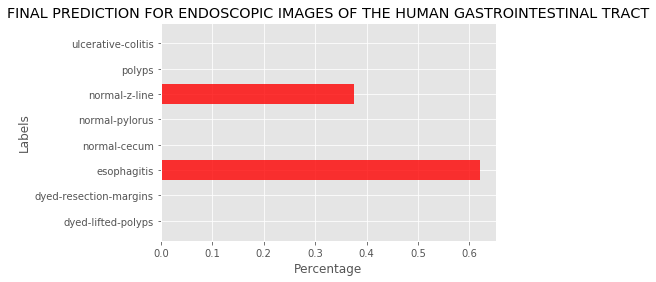

THE FINAL OUTPUT - esophagitis
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-pylorus2.jpg
OUTPUT - normal-pylorus



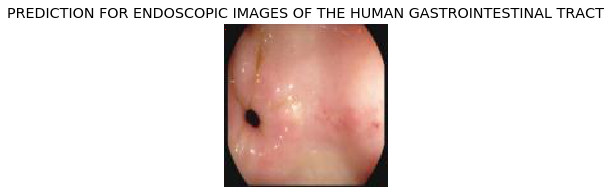

OUTPUT - normal-pylorus



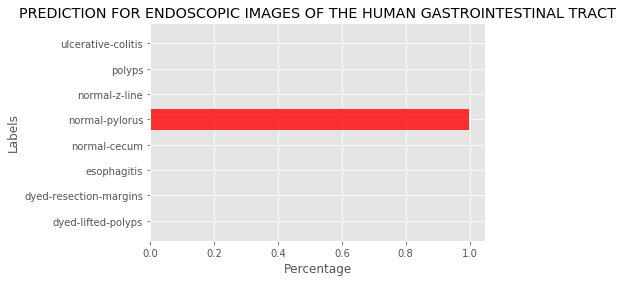

OUTPUT - normal-pylorus



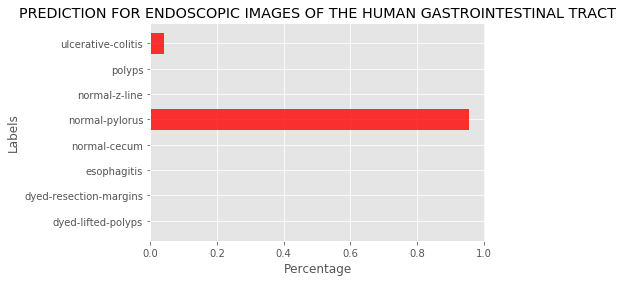

ACTUAL LABEL - normal-pylorus2.jpg



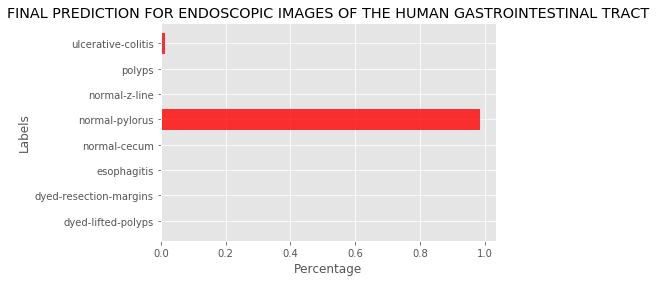

THE FINAL OUTPUT - normal-pylorus
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-pylorus1.jpg
OUTPUT - normal-pylorus



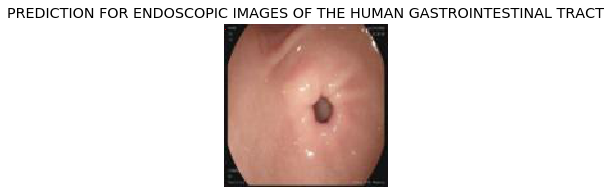

OUTPUT - normal-pylorus



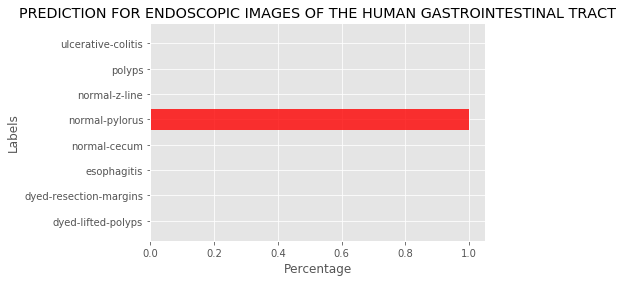

OUTPUT - normal-pylorus



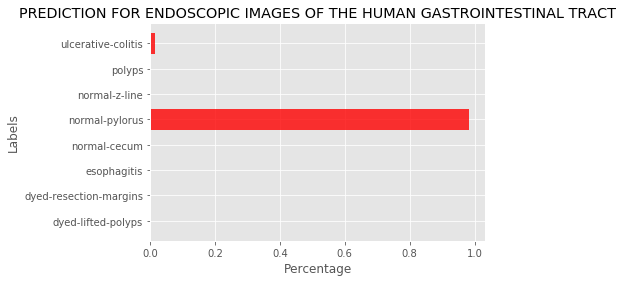

ACTUAL LABEL - normal-pylorus1.jpg



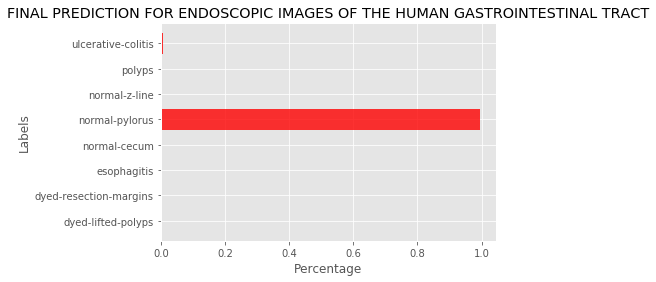

THE FINAL OUTPUT - normal-pylorus
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - esophagitis3.jpg
OUTPUT - esophagitis



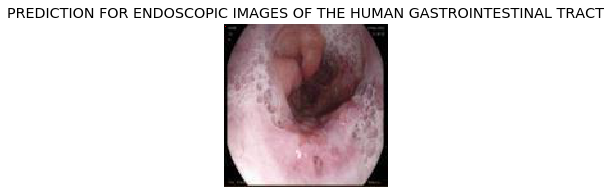

OUTPUT - esophagitis



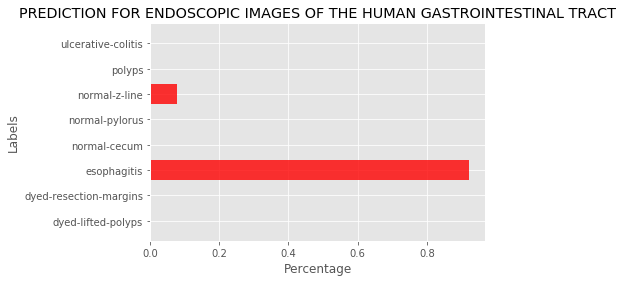

OUTPUT - esophagitis



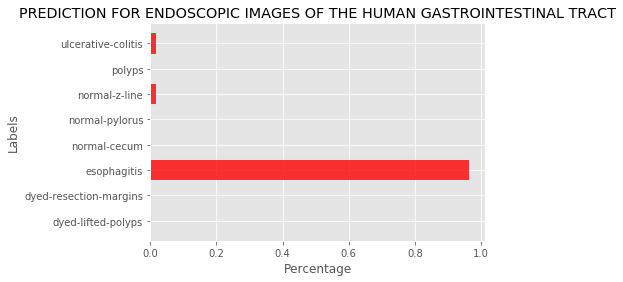

ACTUAL LABEL - esophagitis3.jpg



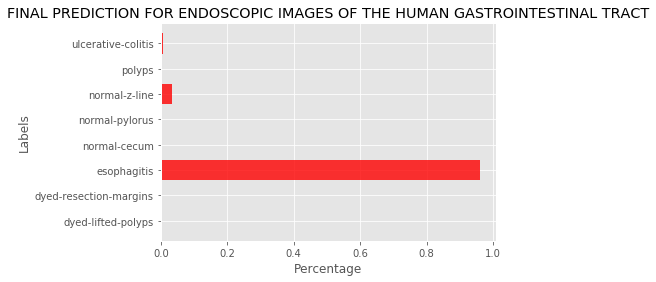

THE FINAL OUTPUT - esophagitis
--------------------------------------------------
--------------------------------------------------



ACTUAL LABEL - normal-pylorus5.jpg
OUTPUT - normal-pylorus



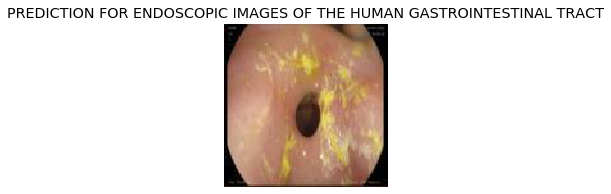

OUTPUT - normal-pylorus



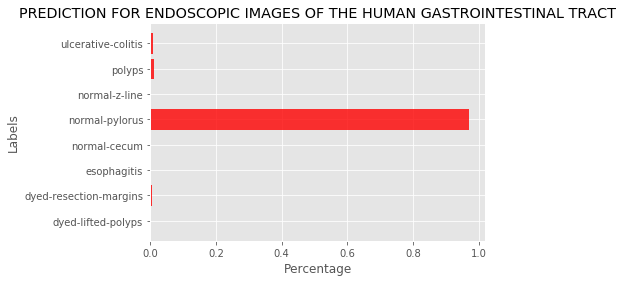

OUTPUT - ulcerative-colitis



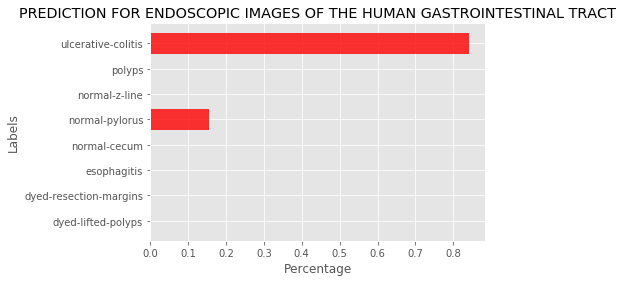

ACTUAL LABEL - normal-pylorus5.jpg



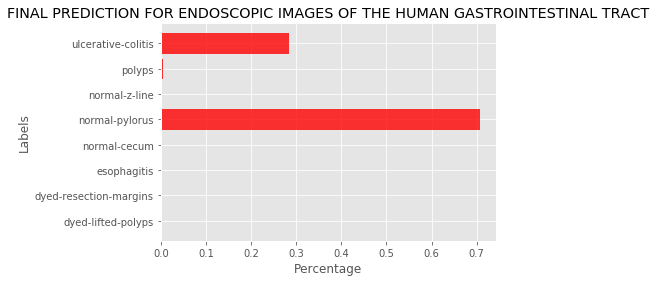

THE FINAL OUTPUT - normal-pylorus
--------------------------------------------------
--------------------------------------------------

ACTUAL LABEL - normal-z-line5.jpg
OUTPUT - normal-z-line



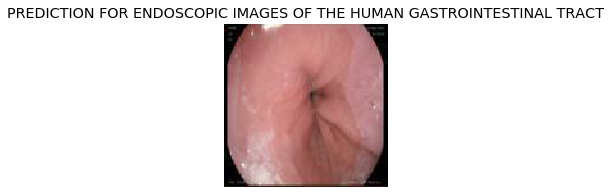

OUTPUT - normal-z-line



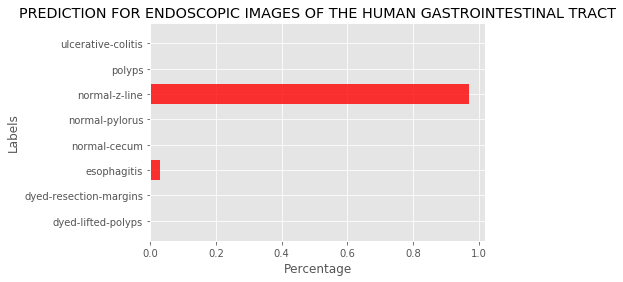

OUTPUT - normal-z-line



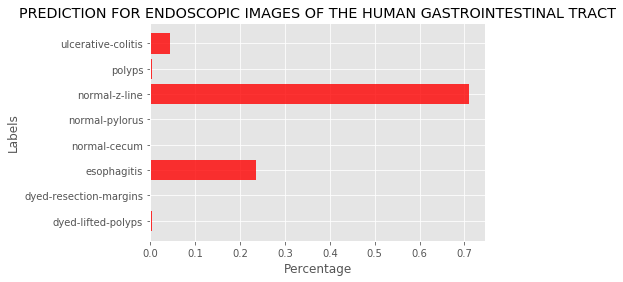

ACTUAL LABEL - normal-z-line5.jpg



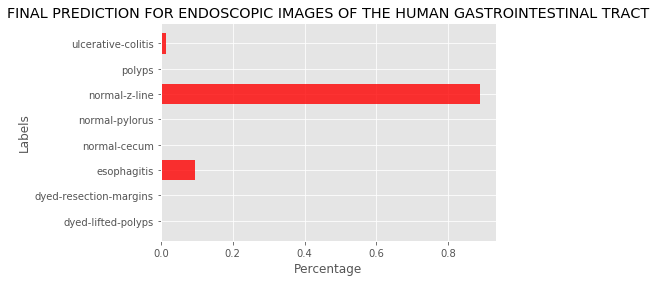

THE FINAL OUTPUT - normal-z-line
--------------------------------------------------
--------------------------------------------------

CPU times: user 47 s, sys: 5.61 s, total: 52.7 s
Wall time: 48.5 s


In [ ]:
%%time
actual = []
predicted = []
for i in os.listdir('/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/endoscopy/'):
  path = i
  img = img_show_resize('/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/endoscopy/'+path)
  imsave('/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/endoscopy/'+path, img)
  testimg = open_image('/content/drive/My Drive/Machine Learning Projects/MEDICAL - GASTRO ENDOSCOPY DISEASE CLASSIFIER/SOURCE CODES AND DATASETS/PRETRAINED MODELS/endoscopy/'+path)
  testimg.show()
  start = "\033[1m"
  end = "\033[0;0m"

  pred1 = learner1.predict(testimg)
  pred2 = learner2.predict(testimg)
  pred3 = learner3.predict(testimg)
  actual.append(str(path))
  print("ACTUAL LABEL - "+ start + str(path) + end)

  plotter_endos(pred1)
  plotter_endos(pred2)
  plotter_endos(pred3)
  print("ACTUAL LABEL - "+ start + str(path) + end)
  out = final_plotter_endos(pred1,pred2,pred3)
  predicted.append(out)
  print("--------------------------------------------------")
  print("--------------------------------------------------")
  print()

In [ ]:
import pandas as pd 
actual1 = [i.split(".")[0] for i in actual]

df = pd.DataFrame(list(zip(actual1, predicted )), columns =['ACTUAL','PREDICTED'])
df['ACTUAL'] = df['ACTUAL'].str.replace('\d+', '')
df['ERRORS'] = np.where((df['ACTUAL'] == df['PREDICTED']) , 'CORRECT' , 'ERROR')
df

ACTUAL               PREDICTED   ERRORS
0       dyed-lifted-polyps      dyed-lifted-polyps  CORRECT
1       dyed-lifted-polyps      dyed-lifted-polyps  CORRECT
2       dyed-lifted-polyps      dyed-lifted-polyps  CORRECT
3       dyed-lifted-polyps      dyed-lifted-polyps  CORRECT
4   dyed-resection-margins  dyed-resection-margins  CORRECT
5   dyed-resection-margins  dyed-resection-margins  CORRECT
6       dyed-lifted-polyps      dyed-lifted-polyps  CORRECT
7   dyed-resection-margins  dyed-resection-margins  CORRECT
8   dyed-resection-margins  dyed-resection-margins  CORRECT
9   dyed-resection-margins  dyed-resection-margins  CORRECT
10  dyed-resection-margins  dyed-resection-margins  CORRECT
11            normal-cecum            normal-cecum  CORRECT
12            normal-cecum            normal-cecum  CORRECT
13            normal-cecum            normal-cecum  CORRECT
14            normal-cecum            normal-cecum  CORRECT
15                  polyps                  polyps  CORRECT
16                  polyps      ulcerative-colitis    ERROR
17                  polyps                  polyps  CORRECT
18                  polyps                  polyps  CORRECT
19            normal-cecum            normal-cecum  CORRECT
20                  polyps      ulcerative-colitis    ERROR
21      ulcerative-colitis      ulcerative-colitis  CORRECT
22      ulcerative-colitis      ulcerative-colitis  CORRECT
23            normal-cecum            normal-cecum  CORRECT
24           normal-z-line           normal-z-line  CORRECT
25                  polyps                  polyps  CORRECT
26      ulcerative-colitis      ulcerative-colitis  CORRECT
27      ulcerative-colitis      ulcerative-colitis  CORRECT
28      ulcerative-colitis      ulcerative-colitis  CORRECT
29      ulcerative-colitis      ulcerative-colitis  CORRECT
30             esophagitis             esophagitis  CORRECT
31             esophagitis             esophagitis  CORRECT
32          normal-pylorus          normal-pylorus  CORRECT
33             esophagitis             esophagitis  CORRECT
34          normal-pylorus          normal-pylorus  CORRECT
35             esophagitis             esophagitis  CORRECT
36           normal-z-line           normal-z-line  CORRECT
37             esophagitis             esophagitis  CORRECT
38           normal-z-line           normal-z-line  CORRECT
39          normal-pylorus          normal-pylorus  CORRECT
40           normal-z-line           normal-z-line  CORRECT
41           normal-z-line             esophagitis    ERROR
42          normal-pylorus          normal-pylorus  CORRECT
43          normal-pylorus          normal-pylorus  CORRECT
44             esophagitis             esophagitis  CORRECT
45          normal-pylorus          normal-pylorus  CORRECT
46           normal-z-line           normal-z-line  CORRECT

In [ ]:
print("Number of errors :",len(df[df['ERRORS'] == 'ERROR']))

Number of errors : 3
